### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

# 

## 1) Assignment activity 1



> Plan the analytical approach.

### Project Scope

The aim of the project is to determine whether the NHS's capacity should be increased or if the current capacity is adequate based on current trends in utilisation. When making decisions about budget, the NHS needs to understand utilisation trends of each component in its network to ensure that its infrastructure and resources match the needs. The main questions posed by the NHS are:

1. Has there been adequate staff and capacity in the networks?
2. What was the actual utilisation of resources? 

Furthermore, the costs associated with missed GP appointments are significant and could potentially be avoided by reducing or eliminating missed appointments, which would be both financially and socially beneficial.


### Understanding the data

It is common to start the business analytics process from a descriptive perspective, before diving deeper into the data. The following questions help define what has occured, and give an initial understanding of the context.

* What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
* What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?

Further analysis can be conducted to explore trends and patterns in the data:

* What is the number of appointments and records per month?
* What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
* What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?

The aim of the data analysis process is to gather insights and impact decision-making, to create business value.  

* What insights can be gained by looking at missed appointments?
* What are the most important patterns visible in the data relating to the use case? 
* What insights can be gained from the data, and what recommendations can be made to the NHS based on these insights?

### Additional questions

**Assignment activity 2**
1. Determine the healthcare professional types.
2. Determine the number of appointment modes.
3. Determine the length of appointments.
4. Determine the time between booking and appointment.
5. How many Integrated Care Boards are there?

**Assignment activity 3**
1. Determine the number of appointments per appointment mode.
2. Which appointment modes have the highest number of missed appointments?
3. Which locations have the highest number of missed appointments?
4. How long do patients have to wait for an appointment after booking?

**Assignment Activity 4**
1. Explore appointment trends on a weekly basis.
2. Explore monthly appointment trends for the ar DataFrame.
3. How did covid-19 national lockdowns impact appointment bookings?
4. Determine the locations with the highest and lowest number of appointments.
5. Compare the wait time for the busiest and least busy location.
6. Compare the wait time for attended and unattended appointments. 
7. Determine the wait time distribution for the whole ar DataFrame date range.

**Assignment Activity 5**

1. Explore tweets containing the words hiring and job.
2. Explore tweets related to NHS and missed appointments.

**Assignment Activity 6**

1. Explore the monthly capacity utilisation for the whole ar DataFrame date range.
2. Explore monthly ICB capacity utilisation
3. Explore the monthly unattended appointments for the whole ar DataFrame date range.
4. Explore appointment modes for the whole ar DataFrame date range.
5. Visualise the number of appointments per appointment mode and the number of unattended appointments per appointment mode.


# 

## 2) Assignment activity 2


> Basic exploration and descriptive statistics.

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

# Import additional libraries if required.
import seaborn as sns
import matplotlib.pyplot as plt

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings("ignore")


### Actual Duration

In [2]:
# Import and sense-check "actual_duration.csv" as ad.
ad = pd.read_csv("actual_duration.csv")

# View the DataFrame.
ad.head()


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
#Sense-check the DataFrame.
print(ad.shape)
print(ad.dtypes)


(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


In [4]:
# Review the column names.
print(ad.columns)


Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


In [5]:
# Check for missing values.
ad.isna().sum()


sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [6]:
# Review metadata and descriptive statistics.
ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [7]:
# Filter the DataFrame to only work with the numeric variables.
ad_num = ad.select_dtypes("number")

ad_num.describe()


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


### Appointments Regional

In [8]:
# Import and sense-check "appointments_regional.csv" as ar.
ar =  pd.read_csv("appointments_regional.csv")

# View the DataFrame.
ar.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [9]:
#Sense-check the DataFrame.
print(ar.shape)
print(ar.dtypes)


(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [10]:
# Review the column names.
print(ar.columns)


Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


In [11]:
# Check for missing values.
ar.isna().sum()


icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [12]:
# Review metadata and descriptive statistics.
ar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [13]:
# Filter the DataFrame to only work with the numeric variables.
ar_num = ar.select_dtypes("number")

ar_num.describe()


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


### National Categories

In [14]:
# Import and sense-check "national_categories.xlsx" as nc.
nc = pd.read_excel("national_categories.xlsx")

# View the DataFrame.
nc.head()


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [15]:
#Sense-check the DataFrame.
print(nc.shape)
print(nc.dtypes)


(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [16]:
# Review the column names.
print(nc.columns)


Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [17]:
# Check for missing values.
nc.isna().sum()


appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [18]:
# Review metadata and descriptive statistics.
nc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [19]:
# Filter the DataFrame to only work with the numeric variables.
nc_num = nc.select_dtypes("number")

nc_num.describe()


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Data Exploration


**Question 1:** How many locations are there in the data set?

To identify the locations and number of records I have decided to use the nc DataFrame, as the ad DataFrame only show data from December 2021 onwards. 

In [20]:
# Determine the number of locations.
print(f"\nCount of locations nc: {nc['sub_icb_location_name'].nunique()}")



Count of locations nc: 106


**Question 2:** What are the five locations with the highest number of records?



In [21]:
# Determine the top five locations based on record count.
print("\nTop five locations based on record count:")
nc["sub_icb_location_name"].value_counts().sort_values(ascending = False).reset_index().head()



Top five locations based on record count:


,sub_icb_location_name,count
0,NHS North West London ICB - W2U3Z,13007
1,NHS Kent and Medway ICB - 91Q,12637
2,NHS Devon ICB - 15N,12526
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
4,NHS North East London ICB - A3A8R,11837


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [22]:
# Determine the number of service settings.
print(f"\nThere are {nc['service_setting'].nunique()} service settings: \n")
for item in nc["service_setting"].unique():
    print(f"- {item}")



There are 5 service settings: 

- Primary Care Network
- Other
- General Practice
- Unmapped
- Extended Access Provision


In [23]:
# Determine the number of context types.
print(f"\nThere are {nc['context_type'].nunique()} context types: \n")
for item in nc["context_type"].unique():
    print(f"- {item}")



There are 3 context types: 

- Care Related Encounter
- Unmapped
- Inconsistent Mapping


In [24]:
# Determine the number of national categories.
print(f"\nThere are {nc['national_category'].nunique()} national categories: \n")
for item in nc["national_category"].unique():
    print(f"- {item}")



There are 18 national categories: 

- Patient contact during Care Home Round
- Planned Clinics
- Home Visit
- General Consultation Acute
- Structured Medication Review
- Care Home Visit
- Unmapped
- Clinical Triage
- Planned Clinical Procedure
- Inconsistent Mapping
- Care Home Needs Assessment & Personalised Care and Support Planning
- General Consultation Routine
- Service provided by organisation external to the practice
- Unplanned Clinical Activity
- Social Prescribing Service
- Non-contractual chargeable work
- Group Consultation and Group Education
- Walk-in


In [25]:
# Determine the number of appointment statuses.
print(f"\nThere are {ar['appointment_status'].nunique()} appointment statuses: \n")
for item in ar["appointment_status"].unique():
    print(f"- {item}")



There are 3 appointment statuses: 

- Attended
- DNA
- Unknown


### Additional Questions

**1. Determine the healthcare professional types.**

In [26]:
print(f"\nThere are {ar['hcp_type'].nunique()} healthcare professional types: \n")
for item in ar["hcp_type"].unique():
    print(f"- {item}")
    


There are 3 healthcare professional types: 

- GP
- Other Practice staff
- Unknown


**2. Determine the number of appointment modes.**

In [27]:
print(f"\nThere are {ar['appointment_mode'].nunique()} appointment modes: \n")
for item in ar["appointment_mode"].unique():
    print(f"- {item}")



There are 5 appointment modes: 

- Face-to-Face
- Home Visit
- Telephone
- Unknown
- Video/Online


**3. Determine the length of appointments.**

In [28]:
print(f"\nThe length of appointments: \n")
for item in sorted(ad["actual_duration"].unique()):
    print(f"- {item}")
    


The length of appointments: 

- 1-5 Minutes
- 11-15 Minutes
- 16-20 Minutes
- 21-30 Minutes
- 31-60 Minutes
- 6-10 Minutes
- Unknown / Data Quality


**4. Detemine the time between booking and appointment.**

In [29]:
print(f"\nTime between booking and appointment: \n")
for item in sorted(ar["time_between_book_and_appointment"].unique()):
    print(f"- {item}")
    


Time between booking and appointment: 

- 1 Day
- 15  to 21 Days
- 2 to 7 Days
- 22  to 28 Days
- 8  to 14 Days
- More than 28 Days
- Same Day
- Unknown / Data Quality


**5. How many Integrated Care Boards are there?**

In [30]:
# Determine the number of Integrated Care Boards. 
print(f"\nThere are {ar['icb_ons_code'].nunique()} Integrated Care Boards.\n")
print(ar["icb_ons_code"].unique())



There are 42 Integrated Care Boards.

['E54000034' 'E54000037' 'E54000044' 'E54000043' 'E54000051' 'E54000025'
 'E54000058' 'E54000062' 'E54000055' 'E54000031' 'E54000054' 'E54000027'
 'E54000036' 'E54000048' 'E54000057' 'E54000041' 'E54000013' 'E54000015'
 'E54000030' 'E54000061' 'E54000024' 'E54000011' 'E54000010' 'E54000019'
 'E54000026' 'E54000053' 'E54000018' 'E54000060' 'E54000029' 'E54000052'
 'E54000038' 'E54000039' 'E54000056' 'E54000042' 'E54000032' 'E54000022'
 'E54000023' 'E54000008' 'E54000028' 'E54000040' 'E54000059' 'E54000050']


# 

## 3) Assignment activity 3


> Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [31]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad["appointment_date"].head()


0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [32]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc["appointment_date"].head()


0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [33]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
ar["appointment_month"].head()


0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object

**Note**

The nc DataFrame appointment_date data type is already datetime, while the ad DataFrame appointment_date and ar DataFrame appointment_month data type is string and needs to be changed into datetime.

In [34]:
# Change the date format of ad["appointment_date"].
ad["appointment_date"] = pd.to_datetime(ad["appointment_date"])

# View the DataFrame.
ad.head()


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


**Note**
In the ar DataFrame the appointment_month column only includes values for year and month. By default, pandas fills in the missing day values with the minimum possible value, which is '01'.

In [35]:
# Change the format of ar["appointment_month"] to datetime.
# Add a new column "appointment_date" to avoid altering the original column, and change format to datetime.
ar["appointment_date"] = pd.to_datetime(ar["appointment_month"])

# View the DataFrame.
ar.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_date
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,2020-01-01
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,2020-01-01
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,2020-01-01
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,2020-01-01
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,2020-01-01


In [36]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print(f"\nThe oldest record in the ad DataFrame is from {ad['appointment_date'].min().strftime('%Y-%m')}")
print(f"The newest record in the ad DataFrame is from {ad['appointment_date'].max().strftime('%Y-%m')}")



The oldest record in the ad DataFrame is from 2021-12
The newest record in the ad DataFrame is from 2022-06


In [37]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(f"\nThe oldest record in the nc DataFrame is from {nc['appointment_date'].min().strftime('%Y-%m')}")
print(f"The newest record in the nc DataFrame is from {nc['appointment_date'].max().strftime('%Y-%m')}")



The oldest record in the nc DataFrame is from 2021-08
The newest record in the nc DataFrame is from 2022-06


In [38]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
print(f"\nThe oldest record in the ar DataFrame is from {ar['appointment_date'].min().strftime('%Y-%m')}")
print(f"The newest record in the ar DataFrame is from {ar['appointment_date'].max().strftime('%Y-%m')}")



The oldest record in the ar DataFrame is from 2020-01
The newest record in the ar DataFrame is from 2022-06


In [39]:
# Determine the common date range for the DataFrames.
print(f"\nIn the ad DataFrame appointments have been scheduled between "\
f"{ad['appointment_date'].min().strftime('%Y-%m')} and {ad['appointment_date'].max().strftime('%Y-%m')}.")
print(f"In the nc DataFrame appointments have been scheduled between "\
f"{nc['appointment_date'].min().strftime('%Y-%m')} and {nc['appointment_date'].max().strftime('%Y-%m')}.")
print(f"In the ar DataFrame appointments have been scheduled between "\
f"{ar['appointment_date'].min().strftime('%Y-%m')} and {ar['appointment_date'].max().strftime('%Y-%m')}.\n")

print("The common date range for the DataFrames is December 2021 to June 2022.")



In the ad DataFrame appointments have been scheduled between 2021-12 and 2022-06.
In the nc DataFrame appointments have been scheduled between 2021-08 and 2022-06.
In the ar DataFrame appointments have been scheduled between 2020-01 and 2022-06.

The common date range for the DataFrames is December 2021 to June 2022.


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [40]:
# Determine the NHS North West London location name.
print(np.unique(nc[nc["sub_icb_location_name"].str.contains("North West")][["sub_icb_location_name"]].values))


['NHS North West London ICB - W2U3Z']


In [41]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc[
    (nc["sub_icb_location_name"] == "NHS North West London ICB - W2U3Z") &
    (nc["appointment_date"].between(dt.datetime(2022, 1, 1), dt.datetime(2022, 6, 1)))
].groupby("service_setting")["count_of_appointments"].sum().sort_values(ascending=False).reset_index()


,service_setting,count_of_appointments
0,General Practice,4804239
1,Unmapped,391106
2,Other,152897
3,Primary Care Network,109840
4,Extended Access Provision,98159


In [42]:
# The most popular service setting during the given time period.
most_popular_ss = nc[
    (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') & 
    (nc['appointment_date'].between(dt.datetime(2022, 1, 1), dt.datetime(2022, 6, 1)))
].groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False) \
.reset_index().iloc[0]['service_setting']

# Number of appointments for this service setting during the given time period.
most_popular_ss_num_appt = nc[
    (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') & 
    (nc['appointment_date'].between(dt.datetime(2022, 1, 1), dt.datetime(2022, 6, 1)))
].groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False) \
.reset_index().iloc[0]['count_of_appointments']

# Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?
print(f"\nThe most popular service setting for NHS North West London from January 1st to June 1st 2022 \
was {most_popular_ss}  with {most_popular_ss_num_appt} appointments.")



The most popular service setting for NHS North West London from January 1st to June 1st 2022 was General Practice  with 4804239 appointments.


**Question 3:** Which month had the highest number of appointments?

In [43]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc.groupby("appointment_month")[["count_of_appointments"]].sum().sort_values(
    "count_of_appointments", ascending=False).head()


,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2022-05,27495508


In [44]:
# The month with the highest number of appointments.
nc_appt_month_highest = nc.groupby("appointment_month")[["count_of_appointments"]].sum().sort_values(
    "count_of_appointments", ascending=False).reset_index().iloc[0]["appointment_month"]

# The number of appointments.
nc_appt_month_num = nc.groupby("appointment_month")[["count_of_appointments"]].sum().sort_values(
    "count_of_appointments", ascending=False).reset_index().iloc[0]["count_of_appointments"]

# Which month had the highest number of appointments?
print(f"\n{nc_appt_month_highest} had the highest number of appointments with a total of {nc_appt_month_num}.")



2021-11 had the highest number of appointments with a total of 30405070.


**Question 4:** What was the total number of records per month?

In [45]:
# Total number of records per month.
nc.groupby("appointment_month")[["count_of_appointments"]].count()


,count_of_appointments
appointment_month,
2021-08,69999
2021-09,74922
2021-10,74078
2021-11,77652
2021-12,72651
2022-01,71896
2022-02,71769
2022-03,82822
2022-04,70012


### Additional Questions

**1. Determine the number of appointments per appointment mode.**

In [46]:
print("\nNumber of appointments per appointment mode:")

# Determine the number of appointments per appointment mode.
ar_appointment_modes_sum = ar.groupby("appointment_mode")["count_of_appointments"].sum() \
.sort_values(ascending=False).reset_index()

# Calculate the percentage for each appointment mode.
ar_appointment_modes_percent = ar.groupby("appointment_mode")[
    "count_of_appointments"].sum() / ar["count_of_appointments"].sum() * 100

# Merge the two DataFrames.
ar_appointment_modes_sum_percent = pd.merge(ar_appointment_modes_sum, 
                                            ar_appointment_modes_percent, 
                                            how="left", 
                                            on="appointment_mode")

# Rename the columns.
ar_appointment_modes_sum_percent.rename(columns={"count_of_appointments_x": "number_of_appointments", 
                                                 "count_of_appointments_y": "percent"}, 
                                        inplace=True)

# Round the "percent" column.
ar_appointment_modes_sum_percent["percent"] = ar_appointment_modes_sum_percent["percent"].round(1)

# View the output.
ar_appointment_modes_sum_percent



Number of appointments per appointment mode:


,appointment_mode,number_of_appointments,percent
0,Face-to-Face,439981729,59.2
1,Telephone,267862657,36.1
2,Unknown,26451305,3.6
3,Home Visit,4887876,0.7
4,Video/Online,3620958,0.5


**Note**

We can see that Face-toFace and Telephone interviews make up the majority of appointments. Video/Online appointments only account for about 0.5% of appointments, it would be interesting to investigate further if this is a resource that could be utilised more, since Face-to-Face and Telephone interviews do account for a large portion of missed appointments. 

**2. Which appointment modes have the highest number of missed appointments?**

In [47]:
print("\nNumber of missed appointments per appointment mode:")

# Determine the number of missed appointments per appointment mode.
ar_missed_appointments_sum = ar[ar["appointment_status"] == "DNA"].groupby("appointment_mode")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# Calculate the percentage for each appointment mode.
ar_missed_appointments_percent = ar[ar["appointment_status"] == "DNA"].groupby("appointment_mode")[
    "count_of_appointments"].sum() / ar[ar["appointment_status"] == "DNA"]["count_of_appointments"].sum() * 100

# Merge the two DataFrames.
ar_missed_appointments_sum_percent = pd.merge(ar_missed_appointments_sum, 
                                            ar_missed_appointments_percent, 
                                            how="left", 
                                            on="appointment_mode")

# Rename the columns.
ar_missed_appointments_sum_percent.rename(columns={"count_of_appointments_x": "number_of_appointments", 
                                                   "count_of_appointments_y": "percent"}, 
                                          inplace=True)

# Round the "percent" column.
ar_missed_appointments_sum_percent["percent"] = ar_missed_appointments_sum_percent["percent"].round(1)

# View the output.
ar_missed_appointments_sum_percent



Number of missed appointments per appointment mode:


,appointment_mode,number_of_appointments,percent
0,Face-to-Face,24253038,78.5
1,Telephone,5262251,17.0
2,Unknown,1049427,3.4
3,Home Visit,187571,0.6
4,Video/Online,158946,0.5


**Note**

The appointment mode with the highest number of missed appointments is Face-to-Face. This would be an interesting area to explore further as the costs associated with missed GP appointments are significant, and perhaps Face-to-Face appointments could be substituted with a different appointment mode when suitable, to enable the patient to attend their appointment.

**3. Which locations have the highest number of missed appointments?**

In [48]:
print("\nLocations with the highest number of missed appointments:")

# Specify appointment status == "DNA", groupby.() "icb_ons_code".
ar[ar["appointment_status"] == "DNA"].groupby("icb_ons_code")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index().head()



Locations with the highest number of missed appointments:


,icb_ons_code,count_of_appointments
0,E54000057,1946114
1,E54000050,1676790
2,E54000008,1658787
3,E54000029,1317005
4,E54000027,1286262


**Note** 

Cross referencing the icb_ons_codes from the ar DataFrame with the nc DataFrame we can see that the following ICBs have the highest number of missed appointments:

* E54000057 - NHS Greater Manchester ICBs
* E54000050 - NHS North East and North Cumbria ICBs
* E54000008 - NHS Cheshire and Merseyside ICBs
* E54000029 - NHS North East London ICB
* E54000027 - NHS North West London ICB

I initially wanted to include the location names to add another layer of detail to the analysis, however as I discovered that there is a one to many relationship between icb_ons_code and sub_icb_location_name I would suggest that further data is needed to determine the specific location names that have the highest number of missed appointments.

In the metadata we are alerted that due to an issue with the data collection, DNA appointments were not captured correctly after June 2018 and are under-reported until and including November 2018 for all practices using the TPP SystmOne system. However, there are no records from this period of time included in the datasets. 


**4. How long do patients have to wait for an appointment after booking?**

In [49]:
print("\nWait time for appointment after booking:")

# Determine how long patients have to wait between booking and appointment.
ar_time_between_book_and_appointment_sum = ar.groupby("time_between_book_and_appointment")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# Calculate the percentage for each amount of time between booking and appointment.
ar_time_between_book_and_appointment_percent = ar.groupby("time_between_book_and_appointment")[
    "count_of_appointments"].sum() / ar["count_of_appointments"].sum() * 100

# Merge the two DataFrames.
ar_time_between_book_and_appointment_sum_percent = pd.merge(ar_time_between_book_and_appointment_sum, 
                                            ar_time_between_book_and_appointment_percent, 
                                            how="left", 
                                            on="time_between_book_and_appointment")

# Rename the columns.
ar_time_between_book_and_appointment_sum_percent.rename(columns={"count_of_appointments_x": 
                                                                 "number_of_appointments", 
                                                                 "count_of_appointments_y": 
                                                                 "percent"}, 
                                                        inplace=True)

# Round the "percent" column.
ar_time_between_book_and_appointment_sum_percent["percent"] = ar_time_between_book_and_appointment_sum_percent[
    "percent"].round(1)

# View the output.
ar_time_between_book_and_appointment_sum_percent



Wait time for appointment after booking:


,time_between_book_and_appointment,number_of_appointments,percent
0,Same Day,342747171,46.1
1,2 to 7 Days,153794531,20.7
2,8 to 14 Days,86846519,11.7
3,1 Day,67716097,9.1
4,15 to 21 Days,42710574,5.7
5,22 to 28 Days,25536541,3.4
6,More than 28 Days,23050987,3.1
7,Unknown / Data Quality,402105,0.1


**Note**

We can see that almost 50% of patients get an appointment the same day as booking, and majority of patients get an appointment within 14 days of booking.

To generate further insight, I have also included the appointment modes in the analysis to enable initial comparisons.


In [50]:
# Group by time_between_book_and_appointment and appointment_mode.
ar_groupby = ar.groupby(["time_between_book_and_appointment",
                         "appointment_mode"])["count_of_appointments"].sum().reset_index()

# Create a pivot table.
piv_1 = pd.pivot_table(
    data=ar_groupby,
    index=["time_between_book_and_appointment"],
    columns=["appointment_mode"],
    values="count_of_appointments"
).reset_index()

# Set indexes based on time between booking and appointment.
piv_1.index = piv_1["time_between_book_and_appointment"].map({"Same Day": 0,
                                                          "1 Day": 1,
                                                          "2 to 7 Days": 2,
                                                          "8  to 14 Days": 3,
                                                          "15  to 21 Days": 4,
                                                          "22  to 28 Days": 5,
                                                          "More than 28 Days": 6,
                                                          "Unknown / Data Quality": 7})

# Sort indexes and view the pivot table.
piv_1.sort_index()


appointment_mode,time_between_book_and_appointment,Face-to-Face,Home Visit,Telephone,Unknown,Video/Online
time_between_book_and_appointment,,,,,,
0,Same Day,160930090,2807990,164493996,13308336,1206759
1,1 Day,39790787,688144,24309339,2440900,486927
2,2 to 7 Days,103526894,855811,43427220,5126725,857881
3,8 to 14 Days,64125218,261666,19330893,2627690,501052
4,15 to 21 Days,32247499,102050,8824190,1274361,262474
5,22 to 28 Days,19883180,67810,4640755,784814,159982
6,More than 28 Days,19267707,77157,2697671,865049,143403
7,Unknown / Data Quality,210354,27248,138593,23430,2480


To give an alternative, and perhaps easier to comprehend overview, the count of appointments for each appointment mode is also converted to percentage.

In [51]:
# Create a DataFrame to hold the count of appointments and total count of appointments per appointment mode.
ar_groupby_percent = pd.merge(ar.groupby(["appointment_mode", 
                                          "time_between_book_and_appointment"]
    )["count_of_appointments"].sum().reset_index(),
    ar.groupby("appointment_mode")["count_of_appointments"].sum().reset_index(),
    how="left",
    on="appointment_mode")

# Create and calculate the percentage column.
ar_groupby_percent["appointment_mode_percentage"] = ar_groupby_percent[
    "count_of_appointments_x"] / ar_groupby_percent["count_of_appointments_y"] * 100

# Round the "appointment_mode_percentage" column.
ar_groupby_percent["appointment_mode_percentage"] = ar_groupby_percent["appointment_mode_percentage"].round(1)

# Create the pivot table.
piv_2 = pd.pivot_table(data=ar_groupby_percent, 
                       index="time_between_book_and_appointment", 
                       columns="appointment_mode", 
                       values="appointment_mode_percentage").reset_index()

# Set indexes based on time between booking and appointment.
piv_2.index = piv_2["time_between_book_and_appointment"].map({"Same Day": 0,
                                                              "1 Day": 1,
                                                              "2 to 7 Days": 2,
                                                              "8  to 14 Days": 3,
                                                              "15  to 21 Days": 4,
                                                              "22  to 28 Days": 5,
                                                              "More than 28 Days": 6,
                                                              "Unknown / Data Quality": 7})

# View the pivot table.
piv_2.sort_index()


appointment_mode,time_between_book_and_appointment,Face-to-Face,Home Visit,Telephone,Unknown,Video/Online
time_between_book_and_appointment,,,,,,
0,Same Day,36.6,57.4,61.4,50.3,33.3
1,1 Day,9.0,14.1,9.1,9.2,13.4
2,2 to 7 Days,23.5,17.5,16.2,19.4,23.7
3,8 to 14 Days,14.6,5.4,7.2,9.9,13.8
4,15 to 21 Days,7.3,2.1,3.3,4.8,7.2
5,22 to 28 Days,4.5,1.4,1.7,3.0,4.4
6,More than 28 Days,4.4,1.6,1.0,3.3,4.0
7,Unknown / Data Quality,0.0,0.6,0.1,0.1,0.1


**Note**

Based on the analysis we can see that when appointment mode is taken into consideration majority of patients still receive an appointment within 14 days, with the majority of each appointment mode the same day.

I find it interesting that the majority of face-to-face appointments and home visits are booked for the same day, as these appointments could be perceived as more resource consuming than for example telephone or video/online appointments and my initial expectation was that patients who require face-to-face appointments or home visits would have to wait longer.

# 

## 4) Assignment activity 4


> Use visual techniques to explore and communicate patterns in the data.

### Create visualisations and identify possible monthly and seasonal trends in the data.

The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

In [52]:
# Set figure size.
sns.set(rc={"figure.figsize":(10, 5)})

# Set the plot style as white.
sns.set_style("white")


### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [53]:
# View the first five rows of appointment_month for the nc DataFrame to determine the date format.
nc["appointment_month"].head()


0    2021-08
1    2021-08
2    2021-08
3    2021-08
4    2021-08
Name: appointment_month, dtype: object

In [54]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc["appointment_month"] = nc["appointment_month"].astype("string")

# Check that the data type has been changed.
nc["appointment_month"].head()


0    2021-08
1    2021-08
2    2021-08
3    2021-08
4    2021-08
Name: appointment_month, dtype: string

In [55]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_appt_per_month = nc.groupby("appointment_month")[["count_of_appointments"]].sum().reset_index()

# View the output.
nc_appt_per_month


,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


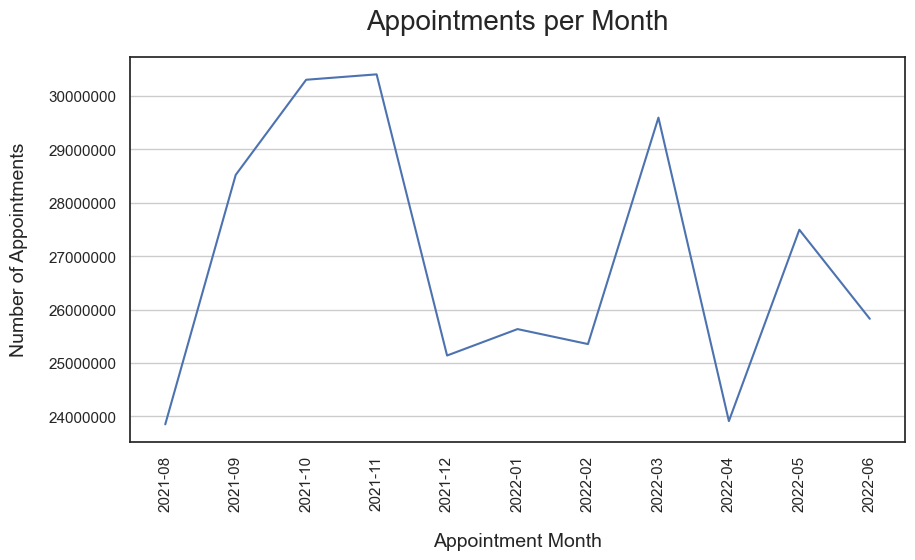

In [56]:
# Plot the amount of appointments per month for the nc DataFrame.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=nc_appt_per_month,
             errorbar=None, 
             palette="colorblind")


# Set the title and labels.
plt.title("Appointments per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

The number of appointment booking increase in autumn but then there is a significant drop during the Christmas period. In spring the number of appointment bookings increase again.

**Service settings:**

In [57]:
# Create a new DataFrame.
nc_appt_ss = nc.groupby(["appointment_month","service_setting"])["count_of_appointments"].sum().reset_index()

# View the output.
nc_appt_ss.head()


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


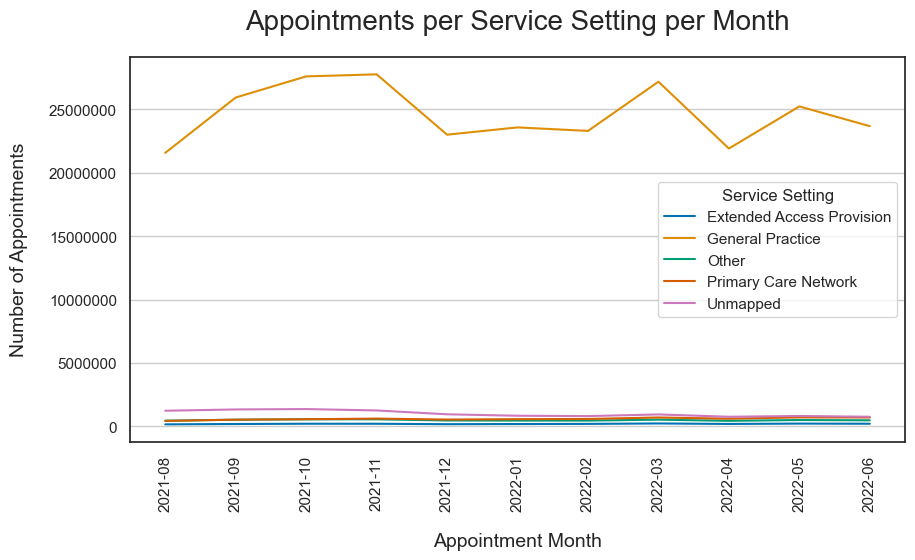

In [58]:
# Create a lineplot to plot the appointments over the available date range, 
# and review the service settings for months.
sns.lineplot(x="appointment_month", 
             y="count_of_appointments",
             data=nc_appt_ss,
             errorbar=None,
             hue="service_setting", 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Service Setting per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Modify legend.
plt.legend(title="Service Setting")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

From the lineplot we can see that there are significantly more General Practice appointments than any other type of service setting appointments. It is difficult to clearly see differences between the other types of service settings, and therefore I will create another plot excluding the General Practice service setting type to decipher trends for the other service stting types. 

In [59]:
# Create a new DataFrame.
nc_appt_ss_no_gp = nc.groupby(["appointment_month", 
                               "service_setting"])["count_of_appointments"].sum().reset_index()

# Filter to exclude General Practice.
nc_appt_ss_no_gp = nc_appt_ss_no_gp[nc_appt_ss_no_gp["service_setting"] != "General Practice"]

# View the output.
nc_appt_ss_no_gp.head()


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906


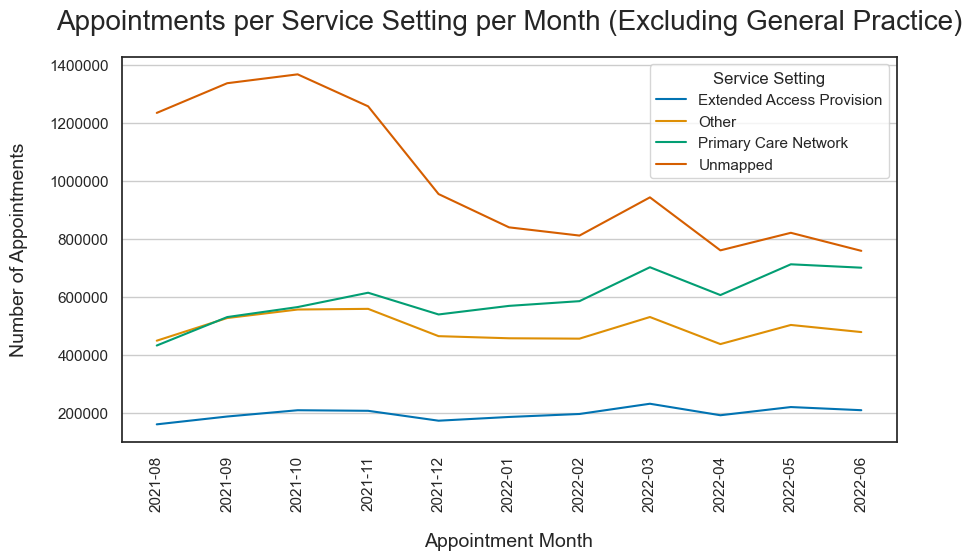

In [60]:
# Create a lineplot to plot the appointments over the available date range, 
# and review the service settings (excluding General Practice) for months.
sns.lineplot(x="appointment_month", 
             y="count_of_appointments",
             data=nc_appt_ss_no_gp,
             errorbar=None,
             hue="service_setting", 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Service Setting per Month (Excluding General Practice)", 
          fontsize=20,
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Modify legend.
plt.legend(title="Service Setting")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Context types:**

In [61]:
# Create a new DataFrame.
nc_appt_ct = nc.groupby(["appointment_month","context_type"])["count_of_appointments"].sum().reset_index()

# View the output.
nc_appt_ct.head()


,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


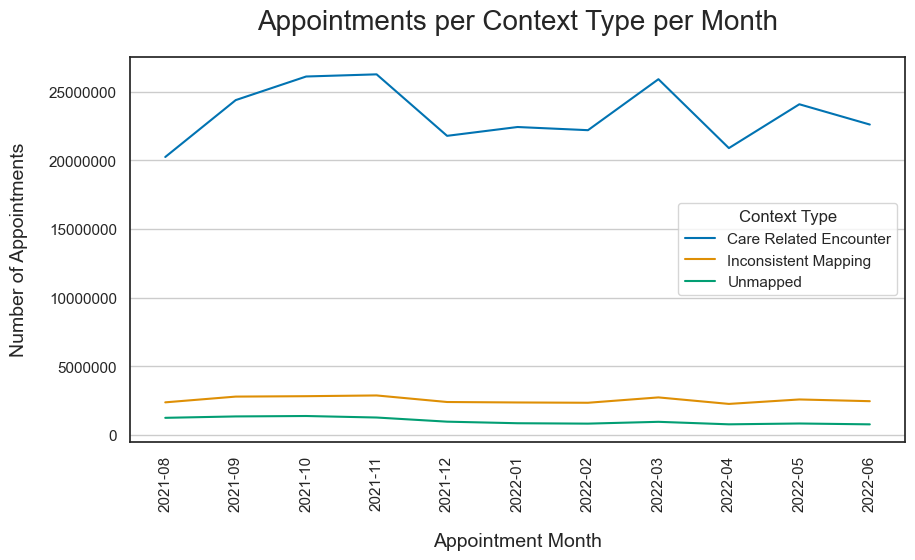

In [62]:
# Create a lineplot to plot the appointments over the available date range,
# and review the context types for months.
sns.lineplot(x="appointment_month", 
             y="count_of_appointments",
             data=nc_appt_ct,
             errorbar=None,
             hue="context_type", 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Context Type per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Modify legend.
plt.legend(title="Context Type")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**National categories:**

In [63]:
# Create a new DataFrame.
nc_appt_nc = nc.groupby(["appointment_month","national_category"])["count_of_appointments"].sum().reset_index()

# View the output.
nc_appt_nc.head()


,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


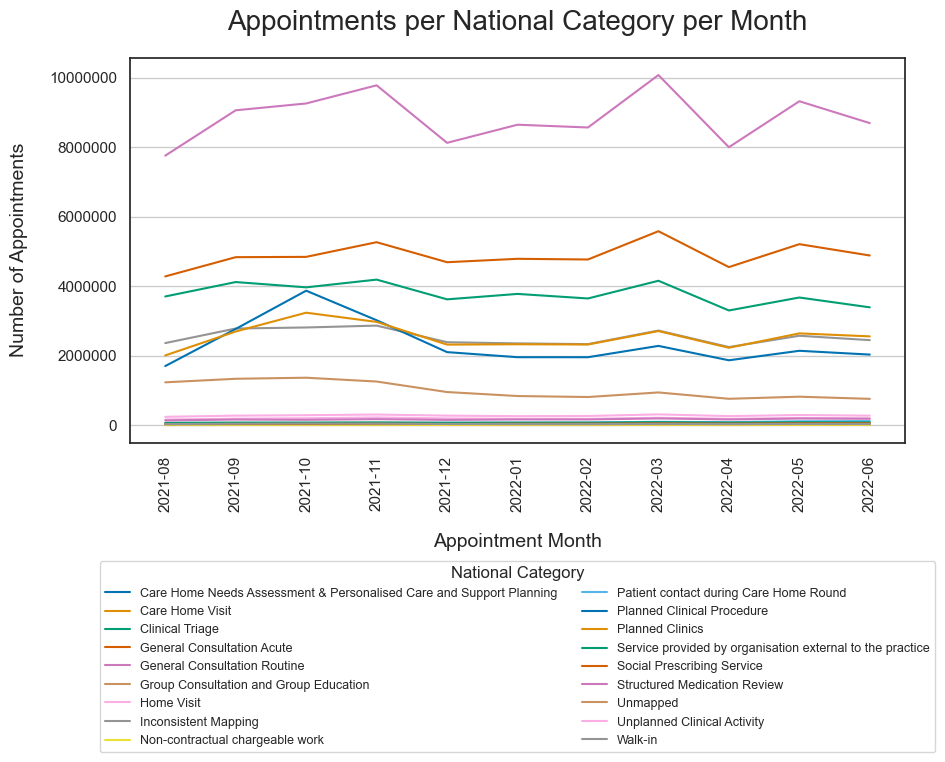

In [64]:
# Adjust the plot size to accomodate the legend.
plt.figure(figsize=(10, 5))

# Create a lineplot to plot the appointments over the available date range,
# and review the national categories for months.
sns.lineplot(x="appointment_month", 
             y="count_of_appointments",
             data=nc_appt_nc,
             errorbar=None,
             hue="national_category",
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per National Category per Month", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Modify legend.
plt.legend(bbox_to_anchor =(0.5, -0.82), 
           fontsize=9,
           loc="lower center",
           ncols=2,
           title="National Category")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

In [65]:
# Create a new DataFrame for dates.
nc_appt_ss_date = nc.groupby(["appointment_date", 
                              "service_setting"])["count_of_appointments"].sum().reset_index()

# View the output.
nc_appt_ss_date.head()


,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054


**Summer (June to August 2021):**


In [66]:
# Create a new DataFrame for Summer.
nc_appt_ss_summer = nc_appt_ss_date[(nc_appt_ss_date["appointment_date"].between(dt.datetime(2021, 6, 1), 
                                                                                 dt.datetime(2021, 8, 31)))]
     
# View the output.
nc_appt_ss_summer.head()
     

,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054


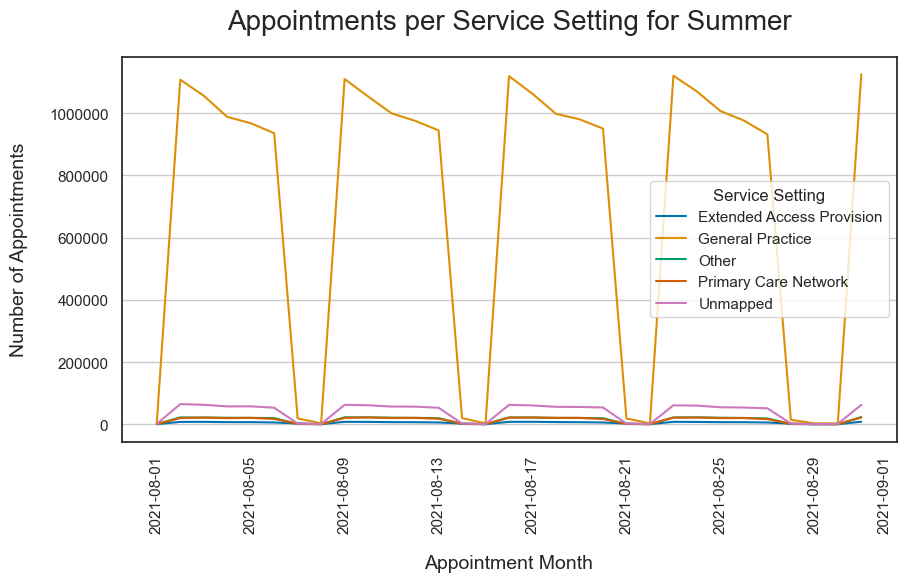

In [67]:
# Create a lineplot to plot the appointments over the Summer date range, 
# and review the service settings for the time period.
sns.lineplot(x="appointment_date", 
             y="count_of_appointments",
             data=nc_appt_ss_summer,
             errorbar=None,
             hue="service_setting", 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Service Setting for Summer", 
          fontsize=20,
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Service Setting")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Autumn: (September to November 2021)**

In [68]:
# Create a new DataFrame for Autumn.
nc_appt_ss_autumn = nc_appt_ss_date[(nc_appt_ss_date["appointment_date"].between(dt.datetime(2021, 9, 1), 
                                                                                 dt.datetime(2021, 11, 30)))]
     
# View the output.
nc_appt_ss_autumn.head()


,appointment_date,service_setting,count_of_appointments
155,2021-09-01,Extended Access Provision,6916
156,2021-09-01,General Practice,1041879
157,2021-09-01,Other,21796
158,2021-09-01,Primary Care Network,21371
159,2021-09-01,Unmapped,57423


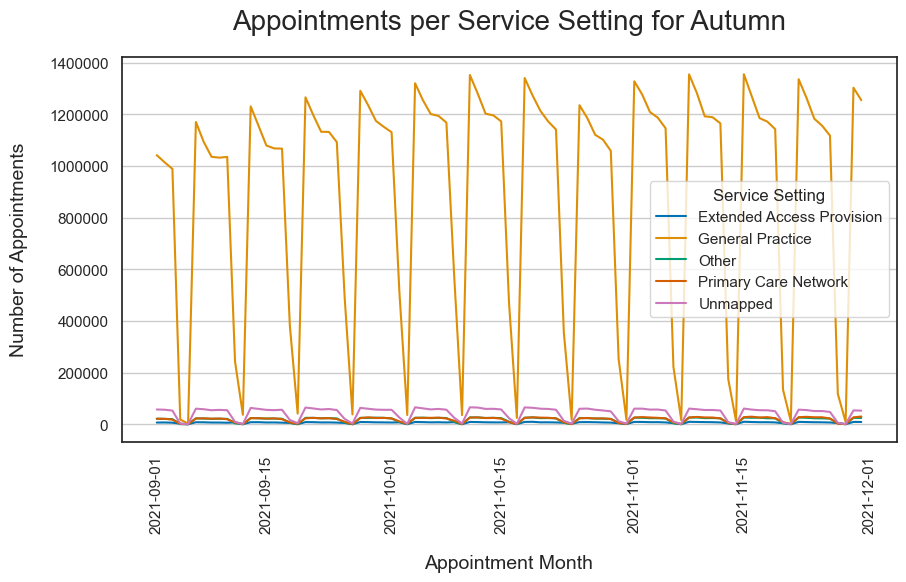

In [69]:
# Create a lineplot to plot the appointments over the Autumn date range, 
# and review the service settings for the time period.
sns.lineplot(x="appointment_date", 
             y="count_of_appointments",
             data=nc_appt_ss_autumn,
             errorbar=None,
             hue="service_setting", 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Service Setting for Autumn", 
          fontsize=20,
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Service Setting")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Winter (December to February 2022):**

In [70]:
# Create a new DataFrame for Winter.
nc_appt_ss_winter = nc_appt_ss_date[(nc_appt_ss_date["appointment_date"].between(dt.datetime(2021, 12, 1), 
                                                                                 dt.datetime(2022, 2, 28)))]
     
# View the output.
nc_appt_ss_winter.head()


,appointment_date,service_setting,count_of_appointments
610,2021-12-01,Extended Access Provision,8500
611,2021-12-01,General Practice,1162676
612,2021-12-01,Other,22924
613,2021-12-01,Primary Care Network,26887
614,2021-12-01,Unmapped,49064


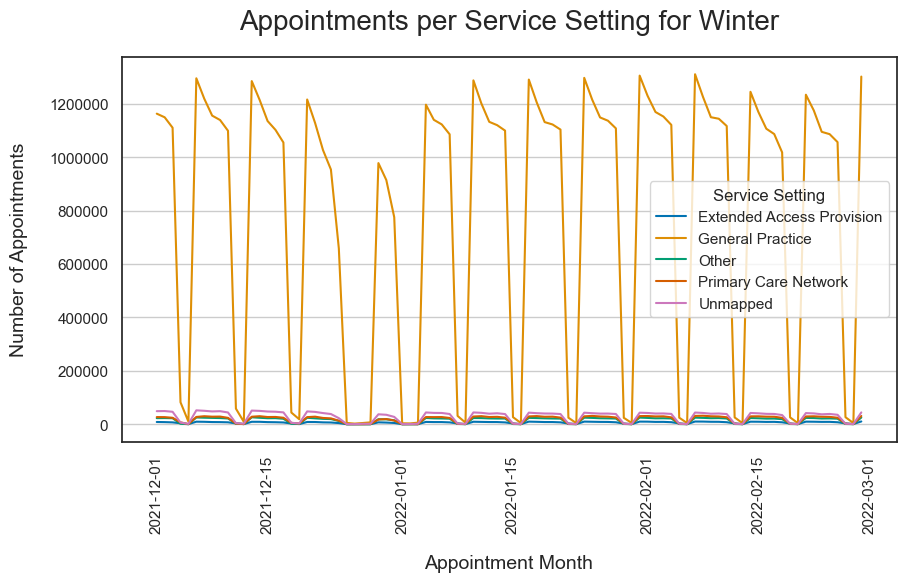

In [71]:
# Create a lineplot to plot the appointments over the Winter date range, 
# and review the service settings for the time period.
sns.lineplot(x="appointment_date", 
             y="count_of_appointments",
             data=nc_appt_ss_winter,
             errorbar=None,
             hue="service_setting", 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Service Setting for Winter", 
          fontsize=20,
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Service Setting")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Spring (March to May 2022):**

In [72]:
# Create a new DataFrame for Spring.
nc_appt_ss_spring = nc_appt_ss_date[(nc_appt_ss_date["appointment_date"].between(dt.datetime(2022, 3, 1), 
                                                                                 dt.datetime(2022, 5, 31)))]
     
# View the output.
nc_appt_ss_spring.head()


,appointment_date,service_setting,count_of_appointments
1060,2022-03-01,Extended Access Provision,10082
1061,2022-03-01,General Practice,1229045
1062,2022-03-01,Other,23986
1063,2022-03-01,Primary Care Network,32070
1064,2022-03-01,Unmapped,42682


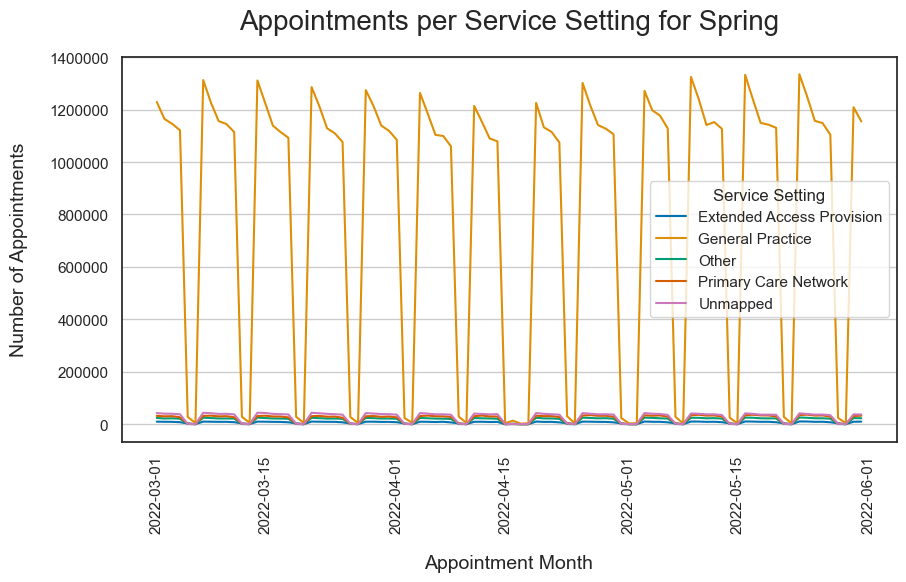

In [73]:
# Create a lineplot to plot the appointments over the Spring date range, 
# and review the service settings for the time period.
sns.lineplot(x="appointment_date", 
             y="count_of_appointments",
             data=nc_appt_ss_spring,
             errorbar=None,
             hue="service_setting", 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Service Setting for Spring", 
          fontsize=20,
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Service Setting")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

There seems to be a similar trend pattern on a weekly basis for all seasons, and we can see that the number of appointments increase after summer, decrease after autumn, and increase again after winter. There is also a noticeable dip in appointment bookings around the Christmas period. I will continue to explore the weekly trend pattern closer.

### Additional Questions

**1. Explore appointment trends on a weekly basis.**

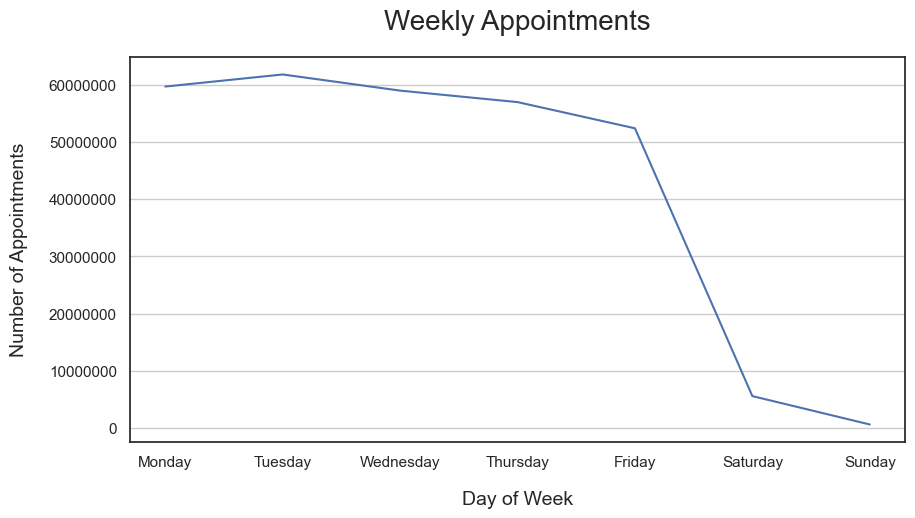

In [74]:
# Create a new DataFrame for the number of appointments for each day of the week.
nc_appt_day = nc.groupby(
    nc["appointment_date"].dt.dayofweek
)["count_of_appointments"].sum().reset_index()

# Create a new column to hold the name of the weekdays.
nc_appt_day["weekday"] = nc_appt_day["appointment_date"].map(
    {0: "Monday", 
     1: "Tuesday", 
     2: "Wednesday", 
     3: "Thursday", 
     4: "Friday", 
     5: "Saturday", 
     6: "Sunday"})

# Create a lineplot to plot weekly trends.
sns.lineplot(
    x="weekday", 
    y="count_of_appointments",
    data=nc_appt_day,
    errorbar=None,
    sort=False, 
    palette="colorblind")

# Set the title and labels.
plt.title("Weekly Appointments", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Day of Week", fontsize=14, labelpad=15)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

We can clearly see that most appointments are booked in the beginning of the week, and the number of booked appointments decrease significantly over the weekend. This could suggest that there are less appointments available over the weekend, and poses an interesting thought about how the weekend potentially impacts appointment attendance. The majority of patients who did not attend their appointment had to wait between 2 and 7 days, up to 14 days. This suggests that patients who have to wait longer for an appointment are less likely to attend and decreasing the time between booking and appointment could have a positive impact on attendance.

It would be interesting to analyse what day of the week patients who did not attend their appointment had made the appointment, and if there for example are any patterns with patients booking an appointment before the weekend having to wait until the following week and not attend. This could in turn imply that more resources are needed on the weekend to decrease the number of missed appointments.

**2. Explore monthly appointment trends for the ar DataFrame.**

In [75]:
# Group by appointment month and count the number of appointments per month.
ar_appointments_per_month = ar.groupby(["appointment_month"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_appointments_per_month.head() 


,appointment_month,count_of_appointments
0,2020-01,27199296
1,2020-02,24104621
2,2020-03,24053468
3,2020-04,16007881
4,2020-05,16417212


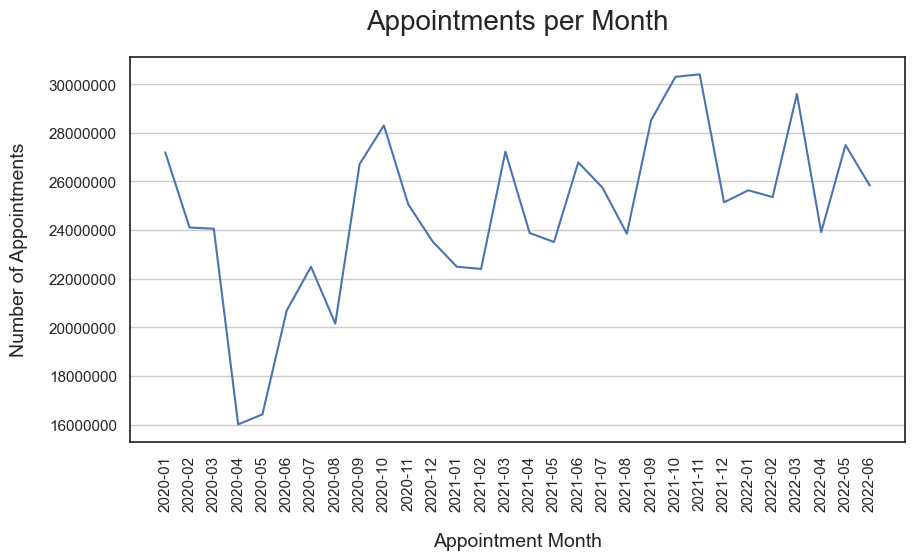

In [76]:
# Plot the amount of appointments per month for the ar DataFrame.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_appointments_per_month,
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

When examining the plot we can see that the data includes the covid-19 time period, and there are some interesting fluctuations in the number of appointment bookings. I will continue to further explore how appointment bookings were impacted during covid-19 by events such as national lockdowns.


**3. How did covid-19 national lockdowns impact appointment bookings?**

I have noted that the available data covers the covid-19 time period, and want to investigate trends and try to discover interesting insights of how appointment bookings were impacted by events such as national lockdowns. 

The first UK national covid-19 lockdown started in March 2020, and the third (and final) national lockdown ended in March 2021. Based on this I will include the preceding and succeeding month and look at a timeframe from February 2020 to April 2021 (https://www.instituteforgovernment.org.uk/sites/default/files/timeline-lockdown-web.pdf).

In [77]:
# Determine the timeframe. 
ar_lockdown_period = ar_appointments_per_month.iloc[1:16]

# View the output.
ar_lockdown_period


,appointment_month,count_of_appointments
1,2020-02,24104621
2,2020-03,24053468
3,2020-04,16007881
4,2020-05,16417212
5,2020-06,20690805
6,2020-07,22491437
7,2020-08,20150520
8,2020-09,26714255
9,2020-10,28301932
10,2020-11,25061602


Text(2021-01, 21000000, 'Third covid-19 lockdown')

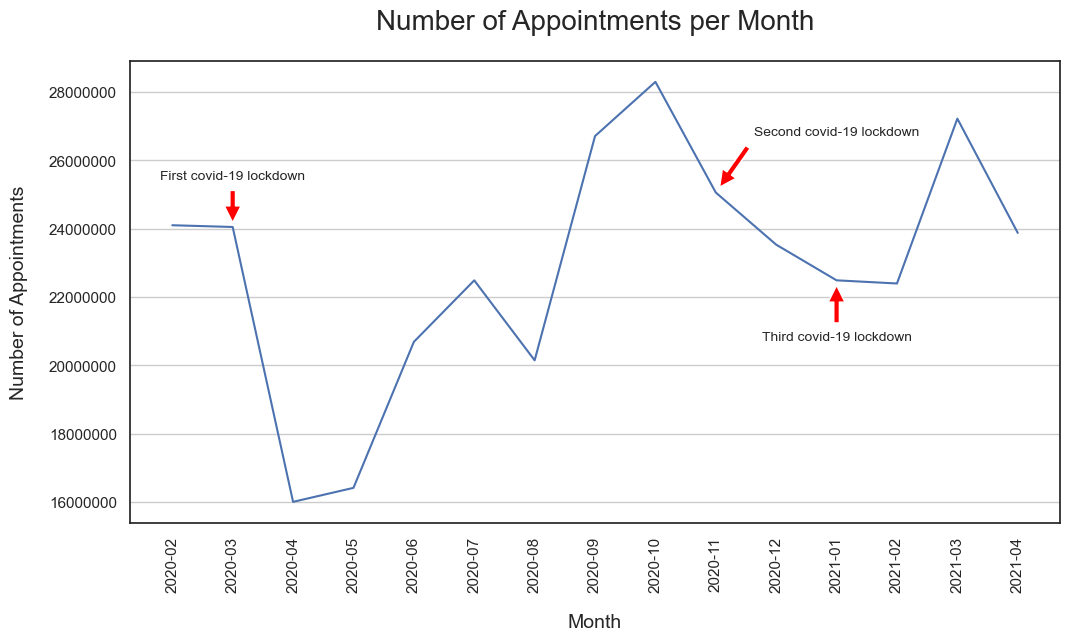

In [78]:
# Plot the number of appointments during the covid-19 time period.
# Create an empty plot
fig_2, ax = plt.subplots()
fig_2.set_size_inches(12, 6)

# Create a lineplot.
sns.lineplot(x="appointment_month",
            y="count_of_appointments",
            data=ar_lockdown_period,
            errorbar=None,
            palette="colorblind")

# Set the labels and title of the plot.
plt.title("Number of Appointments per Month", fontsize=20, y=1.05)
plt.xlabel("Month", fontsize=14, labelpad=15)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Add annotations to highlight significant events.
ax.annotate("First covid-19 lockdown", 
            xy=("2020-03", 24053468),
            xytext=("2020-03", 25700000),
            arrowprops={"facecolor": "red", "shrink": 0.1},
            horizontalalignment="center", 
            verticalalignment="top", 
            fontsize=10)

ax.annotate("Second covid-19 lockdown", 
            xy=("2020-11", 25061602),
            xytext=("2021-01", 27000000),
            arrowprops={"facecolor": "red", "shrink": 0.1},
            horizontalalignment="center", 
            verticalalignment="top", 
            fontsize=10)

ax.annotate("Third covid-19 lockdown", 
            xy=("2021-01", 22492069),
            xytext=("2021-01", 21000000),
            arrowprops={"facecolor": "red", "shrink": 0.1},
            horizontalalignment="center", 
            verticalalignment="top", 
            fontsize=10)


**Note**

Appointment bookings significantly decreased following national covid-19 lockdowns, this leads to a follow up question regarding how different appointment modes were impacted and if there were any significant changes.

In [79]:
# Group by "appointment_month" and "appointment_mode".
ar_groupby_appointment_month_and_mode = ar.groupby(
    ["appointment_month", "appointment_mode"])["count_of_appointments"].sum().reset_index()

#View the DataFrame.
ar_groupby_appointment_month_and_mode.head()


,appointment_month,appointment_mode,count_of_appointments
0,2020-01,Face-to-Face,21733394
1,2020-01,Home Visit,266942
2,2020-01,Telephone,3701775
3,2020-01,Unknown,1302979
4,2020-01,Video/Online,194206


In [80]:
# Determine the timeframe.
ar_lockdown_period_appointment_mode = ar_groupby_appointment_month_and_mode.iloc[5:80]

# View the DataFrame.
ar_lockdown_period_appointment_mode


,appointment_month,appointment_mode,count_of_appointments
5,2020-02,Face-to-Face,19230573
6,2020-02,Home Visit,227935
7,2020-02,Telephone,3322242
8,2020-02,Unknown,1151233
9,2020-02,Video/Online,172638
...,...,...,...
75,2021-04,Face-to-Face,13058306
76,2021-04,Home Visit,148827
77,2021-04,Telephone,9704359
78,2021-04,Unknown,857408


Text(2020-12, 11000000, 'Third covid-19 lockdown')

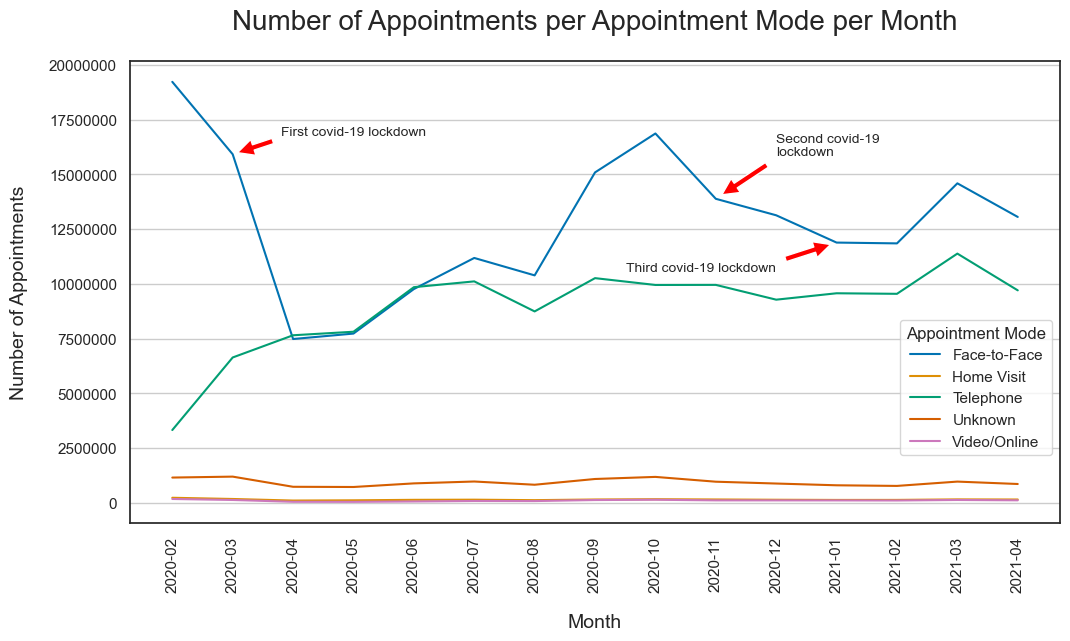

In [81]:
# Plot the number of appointments per appointment mode during the covid-19 time period.
# Create an empty plot
fig_3, ax = plt.subplots()
fig_3.set_size_inches(12, 6)

# Create a lineplot.
sns.lineplot(x="appointment_month",
            y="count_of_appointments",
            data=ar_lockdown_period_appointment_mode,
            hue="appointment_mode",
            errorbar=None,
            palette="colorblind")

# Set the labels and title of the plot.
plt.title("Number of Appointments per Appointment Mode per Month", fontsize=20, y=1.05)
plt.xlabel("Month", fontsize=14, labelpad=15)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Appointment Mode", 
           bbox_to_anchor=(1.0, 0.13), 
           loc="lower right")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# Add annotations to highlight significant events.
ax.annotate("First covid-19 lockdown", 
            xy=("2020-03", 15921794),
            xytext=("2020-05", 17200000),
            arrowprops={"facecolor": "red", "shrink": 0.1},
            horizontalalignment="center", 
            verticalalignment="top", 
            fontsize=10)

ax.annotate("Second covid-19 \nlockdown", 
            xy=("2020-11", 13886990),
            xytext=("2020-12", 16900000),
            arrowprops={"facecolor": "red", "shrink": 0.1},
            horizontalalignment="left", 
            verticalalignment="top", 
            fontsize=10)

ax.annotate("Third covid-19 lockdown", 
            xy=("2021-01", 11887083),
            xytext=("2020-12", 11000000),
            arrowprops={"facecolor": "red", "shrink": 0.1},
            horizontalalignment="right", 
            verticalalignment="top", 
            fontsize=10)


**Note**

As expected, the number of face-to-face appointments decrease significantly following the first national lockdown. However, face-to-face remains the dominant appointment mode as the number of appointments starts rising again. The number of telephone appointments experience an increase leading up to and following the first national lockdown, but there is no significant change in the number of video/online appointments.

**4. Determine the locations that have the highest and lowest number of appointments.**

In [82]:
# Determine the 10 locations with the highest number of appointments.
nc_top_10_locations = nc.groupby("sub_icb_location_name")[["count_of_appointments"]].sum().sort_values(
    "count_of_appointments", ascending=False).reset_index().head(10)

# View the output.
nc_top_10_locations


,sub_icb_location_name,count_of_appointments
0,NHS North West London ICB - W2U3Z,12142390
1,NHS North East London ICB - A3A8R,9588891
2,NHS Kent and Medway ICB - 91Q,9286167
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
4,NHS South East London ICB - 72Q,7850170
5,NHS Devon ICB - 15N,7447758
6,NHS South West London ICB - 36L,7155030
7,NHS Black Country ICB - D2P2L,7033637
8,NHS North Central London ICB - 93C,6747958
9,NHS Birmingham and Solihull ICB - 15E,6383746


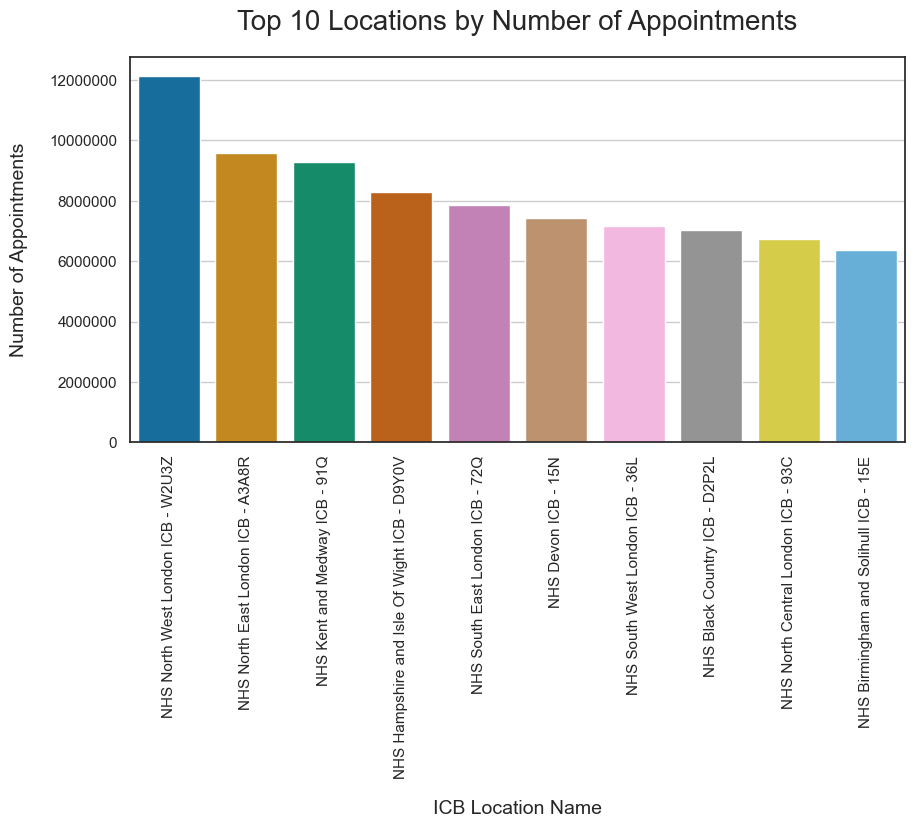

In [83]:
# Plot the 10 locations with the highest number of appointments.
sns.barplot(x="sub_icb_location_name", 
            y="count_of_appointments",
            data=nc_top_10_locations,
            palette="colorblind")

# Set the title and labels.
plt.title("Top 10 Locations by Number of Appointments", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("ICB Location Name", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


In [84]:
# Determine the 10 locations with the lowest number of appointments.
nc_bottom_10_locations = nc.groupby("sub_icb_location_name")[["count_of_appointments"]].sum().sort_values(
    "count_of_appointments").reset_index().head(10)

# View the output.
nc_bottom_10_locations


,sub_icb_location_name,count_of_appointments
0,NHS Lancashire and South Cumbria ICB - 02G,554694
1,NHS Cheshire and Merseyside ICB - 01T,606606
2,NHS Greater Manchester ICB - 00V,639211
3,NHS Nottingham and Nottinghamshire ICB - 02Q,639660
4,NHS Cheshire and Merseyside ICB - 01V,641149
5,NHS Cheshire and Merseyside ICB - 01F,652397
6,NHS Staffordshire and Stoke-on-Trent ICB - 04Y,658981
7,NHS North East and North Cumbria ICB - 00N,708420
8,NHS Staffordshire and Stoke-on-Trent ICB - 05D,711863
9,NHS Staffordshire and Stoke-on-Trent ICB - 05V,720635


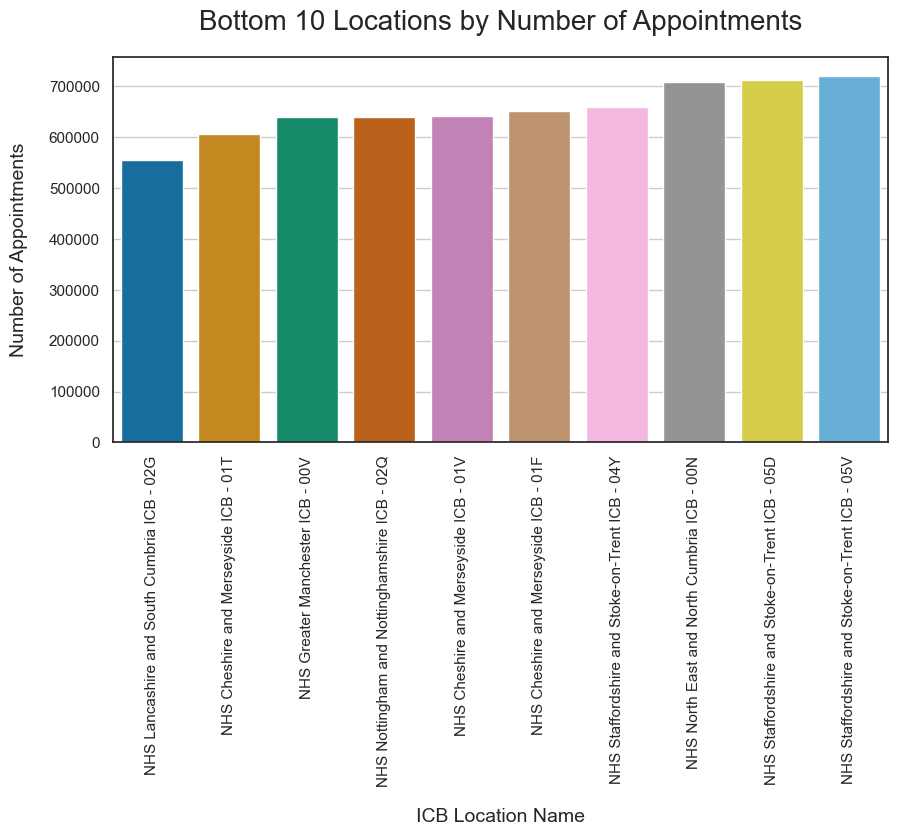

In [85]:
# Plot the 10 locations with the lowest number of appointments.
sns.barplot(x="sub_icb_location_name", 
            y="count_of_appointments",
            data=nc_bottom_10_locations,
            palette="colorblind")

# Set the title and labels.
plt.title("Bottom 10 Locations by Number of Appointments", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("ICB Location Name", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

Having determined the top and bottom 10 locations in terms of number of appointments, I will continue to explore if there is a significant difference in wait time for these locations.

**5. Compare the wait time for the busiest and least busy location.**

**Note** 

An important fact to take into consideration is that the data I am interested in is spread across different data sets, e.g. sub_icb_location_name in the nc DataFrame and time_between_book_and_appointment in the ar DataFrame. I have chosen not to merge the DataFrames, mainly because the icb_ons_code has a one to many relationship and therefore I can not determine which record correlates to a specific sub_icb_location_name. Instead, I will work with the ar DataFrame, performing the analysis on ICB level, and suggest that further data would be required to increase granularity. 

NHS North West London ICB - W2U3Z (E54000027) has the highest number of appointments, and NHS Lancashire and South Cumbria ICB - 02G (E54000048) has the lowest number of appointments. 


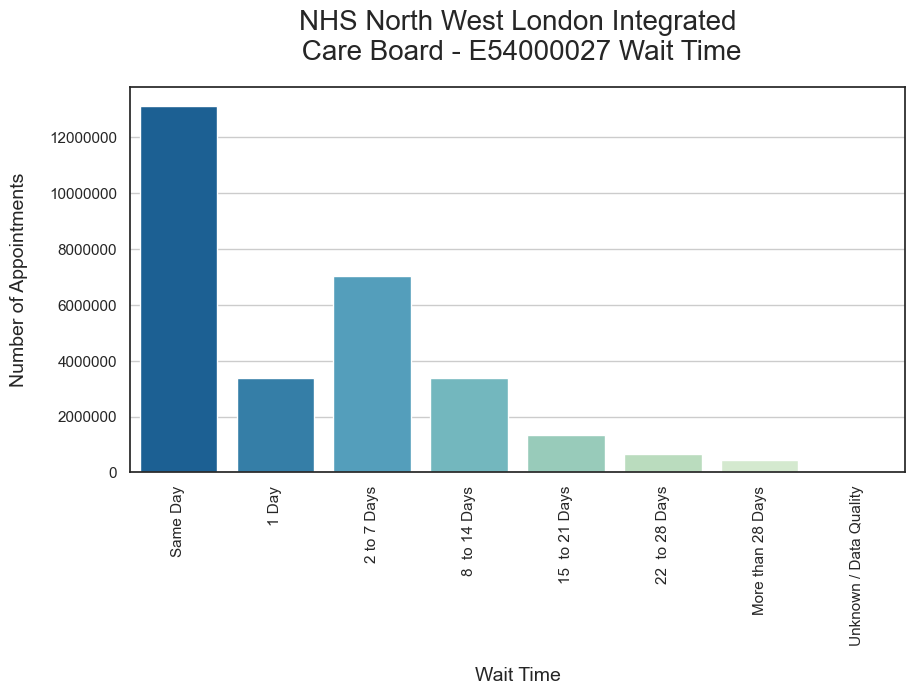

In [86]:
# Determine how long patients have to wait for an appointment in 
# NHS North West London Integrated Care Board - E54000027.
ar_e54000027_wait_time = ar[ar["icb_ons_code"] == "E54000027"].groupby("time_between_book_and_appointment")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# Set indexes based on time between booking and appointment.
ar_e54000027_wait_time.index = ar_e54000027_wait_time["time_between_book_and_appointment"].map(
    {"Same Day": 0,
     "1 Day": 1, 
     "2 to 7 Days": 2, 
     "8  to 14 Days": 3, 
     "15  to 21 Days": 4, 
     "22  to 28 Days": 5, 
     "More than 28 Days": 6, 
     "Unknown / Data Quality": 7})

# Sort values.
ar_e54000027_wait_time_sorted = ar_e54000027_wait_time.sort_index()

# Plot the wait time.
sns.barplot(x="time_between_book_and_appointment", 
            y="count_of_appointments",
            data=ar_e54000027_wait_time_sorted,
            errorbar=None,
            palette="GnBu_r")

# Set the title and labels.
plt.title("NHS North West London Integrated\n Care Board - E54000027 Wait Time", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Wait Time", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


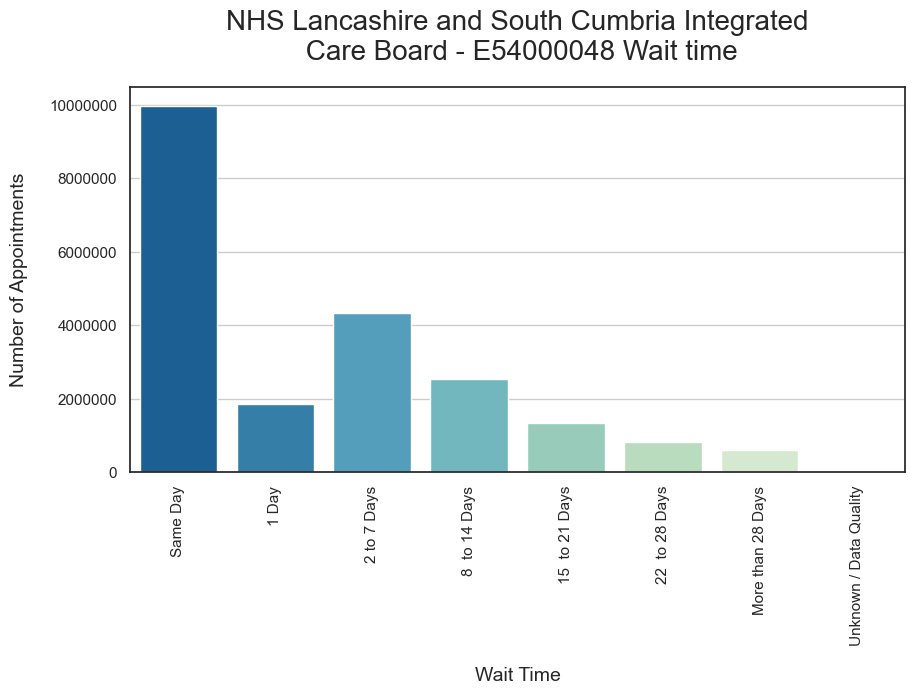

In [87]:
# Determine how long patients have to wait for an appointment in 
# NHS Lancashire and South Cumbria Integrated Care Board - E54000048.
ar_e54000048_wait_time = ar[ar["icb_ons_code"] == "E54000048"].groupby("time_between_book_and_appointment")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# Set indexes based on time between booking and appointment.
ar_e54000048_wait_time.index = ar_e54000048_wait_time["time_between_book_and_appointment"].map(
    {"Same Day": 0,
     "1 Day": 1, 
     "2 to 7 Days": 2, 
     "8  to 14 Days": 3, 
     "15  to 21 Days": 4, 
     "22  to 28 Days": 5, 
     "More than 28 Days": 6, 
     "Unknown / Data Quality": 7})

# Sort values.
ar_e54000048_wait_time_sorted = ar_e54000048_wait_time.sort_index()

# Plot the wait time.
sns.barplot(x="time_between_book_and_appointment", 
            y="count_of_appointments",
            data=ar_e54000048_wait_time_sorted,
            errorbar=None,
            palette="GnBu_r")

# Set the title and labels.
plt.title("NHS Lancashire and South Cumbria Integrated\n Care Board - E54000048 Wait time", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Wait Time", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

There is no significant difference in wait time between the ICB with the highest number of appointments and the ICB with the lowest number of appointments. The wait time distribution between the two locations follows the same pattern. Most patients receive an appointment the same day, or have to wait 2 to 7 days. However, I would consider the level of detail in the analysis to be below the desired level, and ideally should be performed on sub location level. 

**6. Compare the wait time for attended and unattended appointments.**


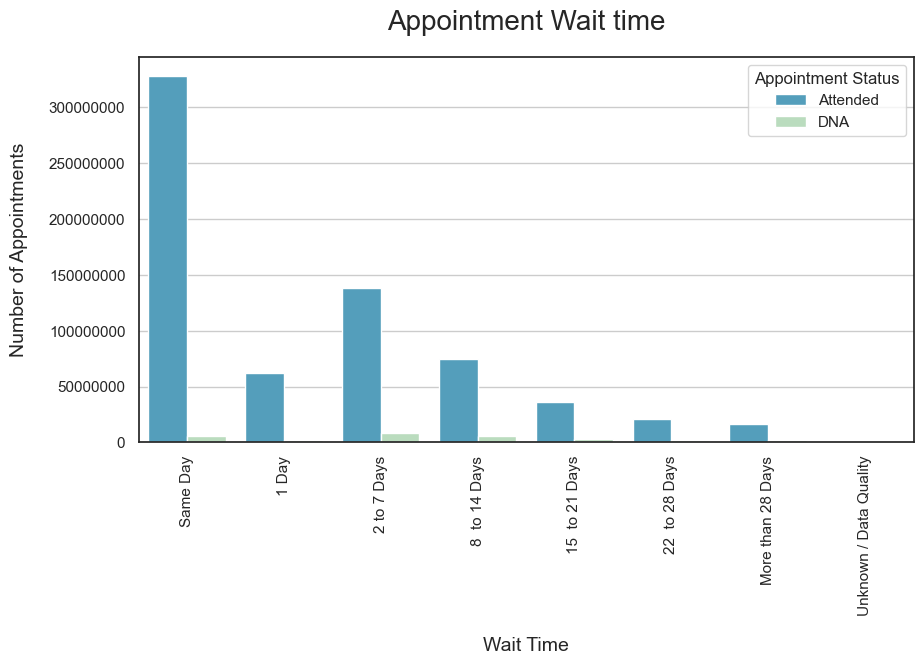

In [88]:
# Filter the ar DataFrame for "appointment_status" == "Attended" or "DNA".
ar_attended_dna = ar[(ar.appointment_status == "Attended") | (ar.appointment_status == "DNA")]

# Determine how long patients have to wait for their appointment.
ar_attended_dna_wait_time = ar_attended_dna.groupby(["time_between_book_and_appointment", "appointment_status"])[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# Set indexes based on time between booking and appointment.
ar_attended_dna_wait_time.index = ar_attended_dna_wait_time["time_between_book_and_appointment"].map(
    {"Same Day": 0,
     "1 Day": 1, 
     "2 to 7 Days": 2, 
     "8  to 14 Days": 3, 
     "15  to 21 Days": 4, 
     "22  to 28 Days": 5, 
     "More than 28 Days": 6, 
     "Unknown / Data Quality": 7})

# Sort values.
ar_attended_dna_wait_time_sorted = ar_attended_dna_wait_time.sort_index()

# Plot the wait time.
sns.barplot(x="time_between_book_and_appointment", 
            y="count_of_appointments",
            data=ar_attended_dna_wait_time_sorted,
            hue="appointment_status",
            errorbar=None,
            palette="GnBu_r")

# Set the title and labels.
plt.title("Appointment Wait time", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Wait Time", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Appointment Status")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

There seems to be a slight difference in the distribution between "Attended" and "DNA" appointment wait time, however it is difficult to clearly see the distribution of DNA appointments in the plot, so I will create separate plots for "Attended" and "DNA" appointments.

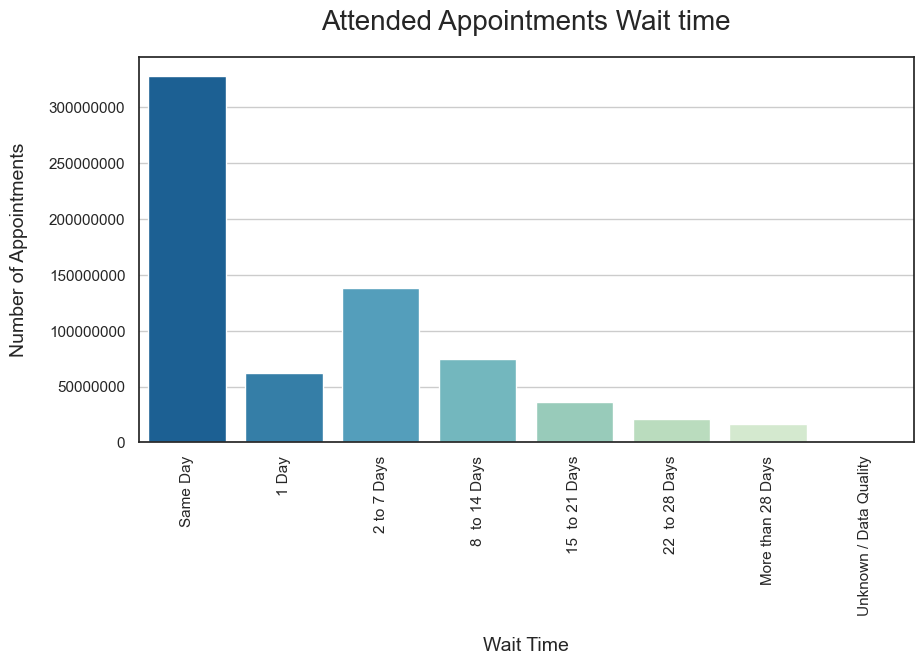

In [89]:
# Determine how long patients who attended their appointments had to wait.
ar_attended_wait_time = ar[ar["appointment_status"] == "Attended"].groupby("time_between_book_and_appointment")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# Set indexes based on time between booking and appointment.
ar_attended_wait_time.index = ar_attended_wait_time["time_between_book_and_appointment"].map(
    {"Same Day": 0,
     "1 Day": 1, 
     "2 to 7 Days": 2, 
     "8  to 14 Days": 3, 
     "15  to 21 Days": 4, 
     "22  to 28 Days": 5, 
     "More than 28 Days": 6, 
     "Unknown / Data Quality": 7})

# Sort values.
ar_attended_wait_time_sorted = ar_attended_wait_time.sort_index()

# Plot the wait time.
sns.barplot(x="time_between_book_and_appointment", 
            y="count_of_appointments",
            data=ar_attended_wait_time_sorted,
            errorbar=None,
            palette="GnBu_r")

# Set the title and labels.
plt.title("Attended Appointments Wait time", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Wait Time", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


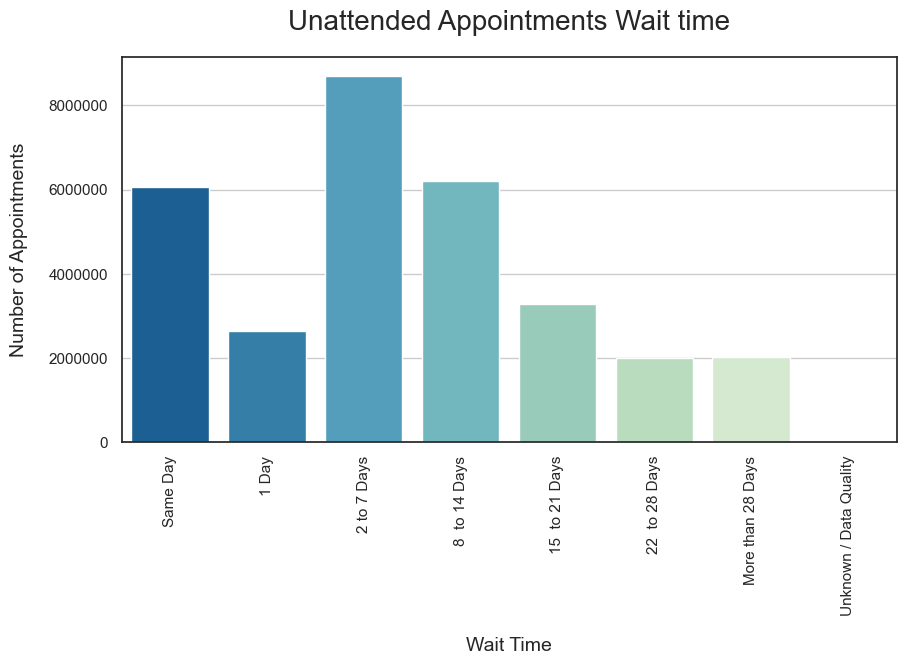

In [90]:
# Determine how long patients who did not attended their appointments had to wait.
ar_dna_wait_time = ar[ar["appointment_status"] == "DNA"].groupby("time_between_book_and_appointment")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# Set indexes based on time between booking and appointment.
ar_dna_wait_time.index = ar_dna_wait_time["time_between_book_and_appointment"].map(
    {"Same Day": 0,
     "1 Day": 1, 
     "2 to 7 Days": 2, 
     "8  to 14 Days": 3, 
     "15  to 21 Days": 4, 
     "22  to 28 Days": 5, 
     "More than 28 Days": 6, 
     "Unknown / Data Quality": 7})

# Sort values.
ar_dna_wait_time_sorted = ar_dna_wait_time.sort_index()

# Plot the wait time.
sns.barplot(x="time_between_book_and_appointment", 
            y="count_of_appointments",
            data=ar_dna_wait_time_sorted,
            errorbar=None,
            palette="GnBu_r")

# Set the title and labels.
plt.title("Unattended Appointments Wait time", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Wait Time", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

While the majority of patients who attended their appointment received an appointment for the same day, majority of patients who did not attend their appointment had to wait between 2 and 7 days up to 14 days. This suggests that patients who have to wait longer for an appointment are less likely to attend the appointment.

**7. Determine the wait time distribution for the whole ar DataFrame date range.**

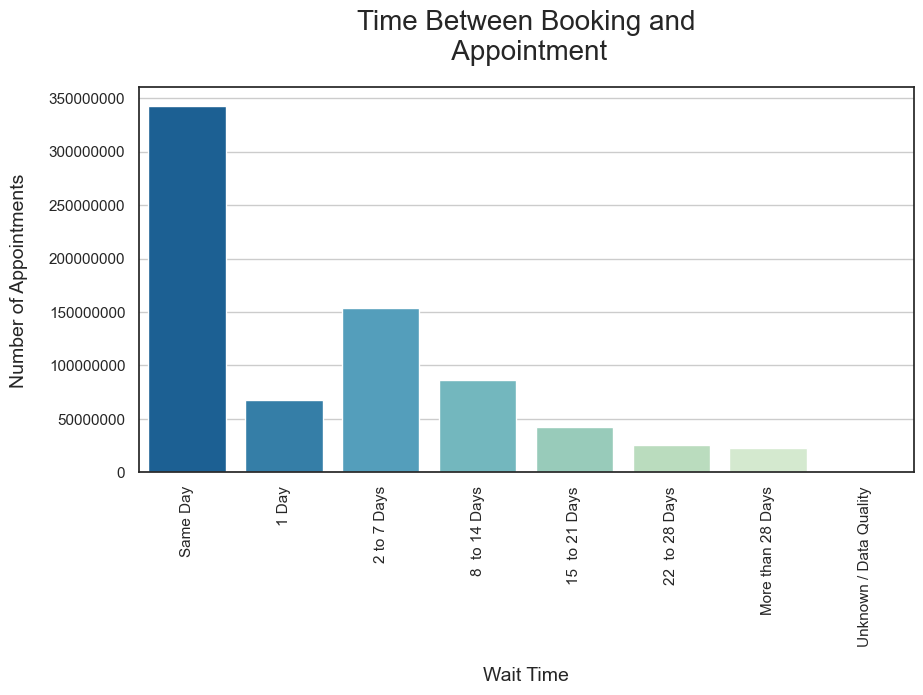

In [168]:
# Determine how long patients have to wait for an appointment.
ar_wait_time = ar.groupby(["time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()

# Set indexes based on time between booking and appointment.
ar_wait_time.index = ar_wait_time[
    "time_between_book_and_appointment"].map({"Same Day": 0, 
                                              "1 Day": 1, 
                                              "2 to 7 Days": 2, 
                                              "8  to 14 Days": 3, 
                                              "15  to 21 Days": 4, 
                                              "22  to 28 Days": 5, 
                                              "More than 28 Days": 6, 
                                              "Unknown / Data Quality": 7})

# Sort values.
ar_wait_time_sorted = ar_wait_time.sort_index()

# Plot the wait time.
sns.barplot(x="time_between_book_and_appointment", 
            y="count_of_appointments",
            data=ar_wait_time_sorted,
            errorbar=None,
            palette="GnBu_r")

# Set the title and labels.
plt.title("Time Between Booking and\n Appointment", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Wait Time", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


# 

## 5) Assignment activity 5

> Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [91]:
# Maximum column width to display.
pd.options.display.max_colwidth = 200


In [92]:
# Import and sense-check "tweets.csv" as tweets.
tweets = pd.read_csv("tweets.csv")

# View the DataFrame.
tweets.head()


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [93]:
# Sense check the DataFrame.
print(tweets.shape)
print(tweets.dtypes)


(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


In [94]:
# Review the column names.
print(tweets.columns)


Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


In [95]:
# Check for missing values.
tweets.isna().sum()


tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64

In [96]:
# Review the metadata.
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [97]:
# Review descriptive statistics.
tweets.describe()


,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


**Note**

There is no column for tweet date, and no further information regarding the period of time when the twitter data has been collected.

In [98]:
# Would it be useful to only look at retweeted and favourite tweet messages? Explain your answer.
# Explore the retweeted tweets.
tweets[tweets["tweet_retweet_count"] >= 1].sort_values(by="tweet_retweet_count", ascending=False)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
263,1567649792897032192,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': ""Ultima Lions' Den"", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",303,0,False,False,en
1139,1567585317498003456,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
979,1567594695890542592,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
595,1567621342987718656,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
1132,1567585759036669958,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
411,1567637666048638976,NDF’s Research Program (IGTDP) Moves Closer to a Cure for GNE Myopathy (GNEM): - BioSpace https://t.co/Dm9gmxJuiK #strategy #competitiveintelligence #marketing #competitivemarketing #pharmaceutica...,"{'hashtags': [{'text': 'strategy', 'indices': [114, 123]}, {'text': 'competitiveintelligence', 'indices': [124, 148]}, {'text': 'marketing', 'indices': [149, 159]}, {'text': 'competitivemarketing'...","#strategy, #competitiveintelligence, #marketing, #competitivemarketing, #pharmaceutical, #healthcare, #pharma, #biotech","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
841,1567604313542762497,"🤬 If it isn’t already obvious, there really isn’t a separation of church and state. And it’s getting worse. #HIVcare #healthcare #LGBTQI https://t.co/zhiVN11REH","{'hashtags': [{'text': 'HIVcare', 'indices': [108, 116]}, {'text': 'healthcare', 'indices': [117, 128]}, {'text': 'LGBTQI', 'indices': [129, 136]}], 'symbols': [], 'user_mentions': [], 'urls': [{'...","#HIVcare, #healthcare, #LGBTQI","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
407,1567637856184840194,"RT @_timos_: iECURE Receives FDA Orphan Drug Designation for GTP-506, an Investigational Gene Editing Product Candidate for the Treatment o…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '_timos_', 'name': 'Dr Timos Papagatsias', 'id': 133504478, 'id_str': '133504478', 'indices': [3, 11]}], 'urls': []}",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,Fal

In [99]:
# Explore the favorited tweets.
tweets[tweets["tweet_favorite_count"] >= 1].sort_values(by="tweet_favorite_count", ascending=False)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
1156,1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",12,42,False,False,en
9,1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,"{'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', '...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,28,False,False,en
442,1567634936341069826,How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb,"{'hashtags': [{'text': 'comedy', 'indices': [31, 38]}, {'text': 'adulting', 'indices': [39, 48]}, {'text': 'healthcare', 'indices': [49, 60]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'med...","#comedy, #adulting, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",5,20,False,False,en
84,1567579049043832832,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...","{'hashtags': [{'text': 'healthcare', 'indices': [22, 33]}, {'text': 'cdnpoli', 'indices': [270, 278]}], 'symbols': [], 'user_mentions': [], 'urls': []}","#healthcare, #cdnpoli","{'iso_language_code': 'en', 'result_type': 'recent'}",4,18,False,False,en
1122,1567586306607423488,"Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...","{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [64, 79]}, {'text': 'MedEd', 'indices': [80, 86]}, {'text': 'MedTwitter', 'indices': [87, 98]}, {'text': 'medicine', 'indices': [99, 108]}, {'te...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",3,17,False,False,en
...,...,...,...,...,...,...,...,...,...,...
661,1567618266818052097,"New CNA Classes at the Alexandria Campus. For more information, please scan the QR Code or email paulabutterfield@cltcc.edu. #goCLTCC😸 #BobcatProud🐾 #Healthcare #CNA https://t.co/tPnJAwLko3","{'hashtags': [{'text': 'goCLTCC', 'indices': [125, 133]}, {'text': 'BobcatProud', 'indices': [135, 147]}, {'text': 'Healthcare', 'indices': [149, 160]}, {'text': 'CNA', 'indices': [161, 165]}], 's...","#goCLTCC, #BobcatProud, #Healthcare, #CNA","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
652,1567618712248664066,Proud to be donating blood @CanadasLifeline today but so disappointed to see that all #COVID precautions are gone. No one even asked me if I had any symptoms. This is a #healthcare facility &amp; ...,"{'hashtags': [{'text': 'COVID', 'indices': [86, 92]}, {'text': 'healthcare', 'indices': [169, 180]}], 'symbols': [], 'user_mentions': [{'screen_name': 'CanadasLifeline', 'name': 'Canadian Blood Se...","#COVID, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",1,1,False,False,en
642,1567618996333068290,"Night-shift nurses frequently miss out on benefits of sh

**Note**

A tweet that has been retweeted or favorited could be considered to hold greater value, however the perceived value is greatly subjective. The original twitter data set is fairly small, and I do not believe that we are adding any aditional value to the analysis by limiting ourselves further to only include retweeted and favorited tweets. 

In [100]:
# Create a new DataFrame containing only the text.
tweets_text = tweets.select_dtypes("object")

# View the DataFrame.
tweets_text.head()


,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_lang
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",en
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",en
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",en


In [101]:
# Loop through the messages, and create a list of values containing the # symbol.
tags_list = []

for y in [x.split(" ") for x in tweets["tweet_full_text"].values]:
    for z in y:
        if "#" in z:
            tags_list.append(z.lower())

# Display the first 30 records.
tags_list[:30]


['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [102]:
# Create a Pandas Series from the list.
tags_series = pd.Series(tags_list)

# View the Series.
tags_series


0              #healthcare
1           #premisehealth
2                  #hiring
3              #healthcare
4                  🚨#new:🚨
               ...        
4328    #mediqueststaffing
4329             #hospital
4330                #shift
4331       (#newportbeach)
4332                  #job
Length: 4333, dtype: object

In [103]:
# Count the values in the Series.
tags_count = tags_series.value_counts()

# View the output.
tags_count


#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Name: count, Length: 1754, dtype: int64

In [105]:
# Convert the series to a DataFrame in preparation for visualisation.
hashtags = pd.DataFrame(data=tags_count).reset_index()

# Rename the columns.
hashtags.columns = ["tag", "count"]

# View the DataFrame.
hashtags.head()


,tag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [106]:
# Sense check the DataFrame.
print(hashtags.shape)
print(hashtags.dtypes)
hashtags.info()


(1754, 2)
tag      object
count     int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [107]:
# Display records where the count is larger than 10.
hashtags_10 = hashtags[hashtags["count"] > 10]

# View the output.
hashtags_10


,tag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


**Note**

Limiting the records to where the count is larger that 10 still leaves 47 different tags, which will make the plot crowded and difficult to read. For this reason I will limit the count to larger than on equal to 15.

In [108]:
# Display records where the count is larger than or equal to 15.
hashtags_15 = hashtags[hashtags["count"] >= 15]

# View the output.
hashtags_15


,tag,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


Text(0.5, 0, 'Count')

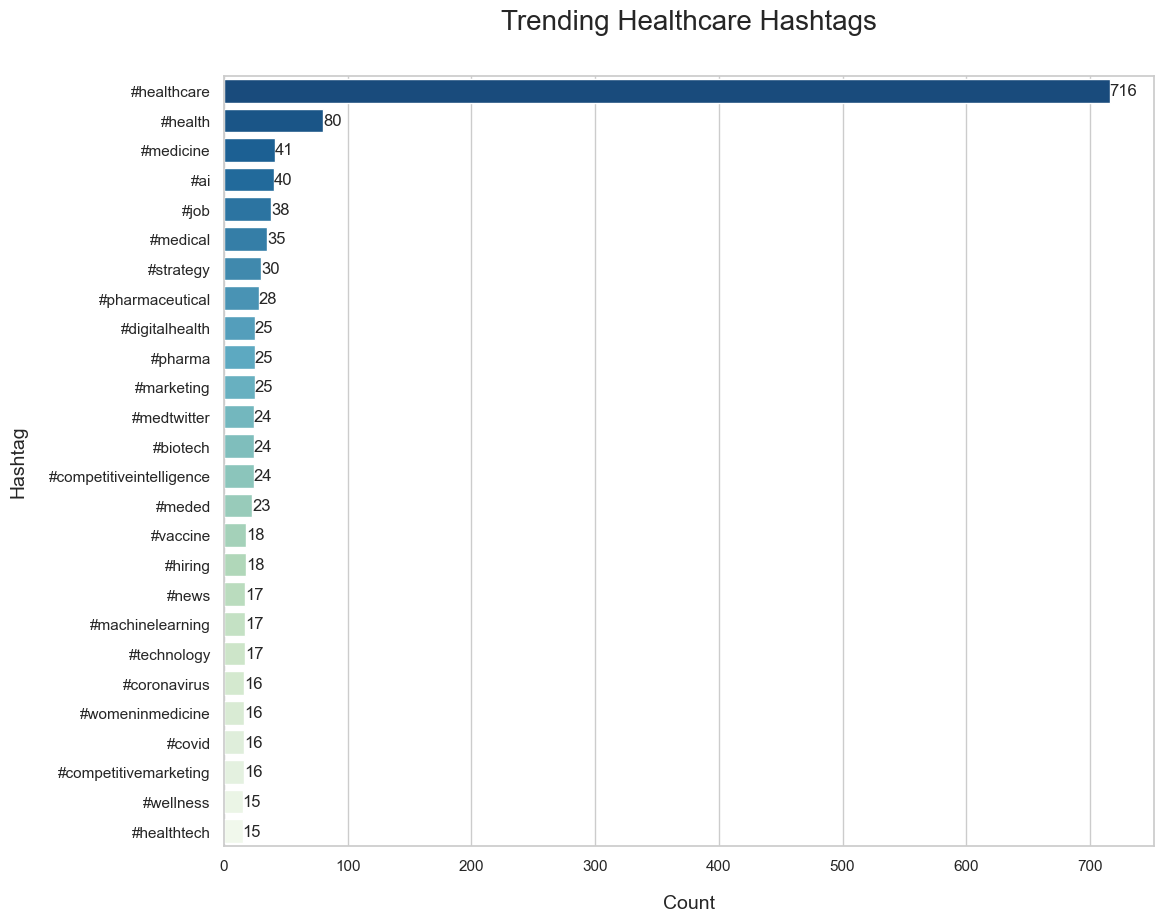

In [109]:
# Set the plot size and style.
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")

# Create a Seaborn barplot displaying records with a count larger than 15.
ax = sns.barplot(x="count", 
                 y="tag",
                 data=hashtags_15,
                 palette="GnBu_r")

# Add labels to the bars. 
for i in ax.containers:
    ax.bar_label(i,)

# Set the title and labels.
plt.title("Trending Healthcare Hashtags", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Hashtag", fontsize=14, labelpad=15)
plt.xlabel("Count", fontsize=14, labelpad=15)


**Note** 

Many of the hashtags on the list revolve around health and healthcare, however both #job and #hiring also appear on this list, and I will explore this further.

### Additional questions

**1. Explore tweets containing the words hiring and job.**

In [110]:
# Search the "tweet_full_text" column for tweets containing "job".
job_tweets = tweets[tweets["tweet_full_text"].str.contains("job", case=False)]

# View the result.
print(job_tweets.shape)
job_tweets


(100, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
12,1567582294424035329,Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for Licensed Practical Nurse (LPN). #Healthcare #qualitypatientcare #jobs \nhttp...,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [75, 89]}, {'text': 'hiring', 'indices': [108, 115]}, {'text': 'Healthcare', 'indices': [152, 163]}, {'text': 'qualitypatientcare', 'indices': [1...","#PremiseHealth, #hiring, #Healthcare, #qualitypatientcare, #jobs, #job","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
21,1567581829737361409,"If you're looking for work in #Chicago, IL, check out this job: https://t.co/a0pMleJWVj #Healthcare","{'hashtags': [{'text': 'Chicago', 'indices': [30, 38]}, {'text': 'Healthcare', 'indices': [88, 99]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/a0pMleJWVj', 'expanded_url'...","#Chicago, #Healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
23,1567581730546089985,RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift - Interviewing Now!! (#NewportBeach) #job http…,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [41, 59]}, {'text': 'Hospital', 'indices': [69, 78]}, {'text': 'shift', 'indices': [85, 91]}, {'text': 'NewportBeach', 'indices': [115, 128]}...","#MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
24,1567581708320481282,Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift - Interviewing Now!! (#NewportBeach) #job https://t.co/KRPpI6K7Qd #jobs #employment #healthcare #job #hiring https://t.co/...,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [22, 40]}, {'text': 'Hospital', 'indices': [50, 59]}, {'text': 'shift', 'indices': [66, 72]}, {'text': 'NewportBeach', 'indices': [96, 109]},...","#MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job, #jobs, #employment, #healthcare, #job, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
33,1567581004084445185,"See our latest #Albuquerque, NM #Healthcare job opportunity and click the link in our bio to apply: Memory Care Caregiver at Morada Senior Living","{'hashtags': [{'text': 'Albuquerque', 'indices': [15, 27]}, {'text': 'Healthcare', 'indices': [32, 43]}], 'symbols': [], 'user_mentions': [], 'urls': []}","#Albuquerque, #Healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1085,1567588561947430915,"Job Opportunity! We're in need of a FT Patient Representative/Appointment Scheduler for our Urology Clinic. If you're interested, apply today! https://t.co/hgiFlDKDZA \n-\n#CRMC #healthcare https:...","{'hashtags': [{'text': 'CRMC', 'indices': [170, 175]}, {'text': 'healthcare', 'indices': [176, 187]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/hgiFlDKDZA', 'expanded_url...","#CRMC, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1106,1567586941805432832,"We are very appreciative, very proud of the efforts and the hard work that's been put in by our CNAs!\n\nThank You Healthcare Heroes to touch so many lives!\n\n#sisucare #cna #cnatraining #onlinec...","{'hashtags': [{'text': 'sisucare', 'indices': [156, 165]}, {'text': 'cna', 'indices': [166, 170]}, {'text': 'cnatraining', 'indices': [171, 183]}, {'text': 'onlinecnatraining', 'indices': [184, 20...","#sisucare, #cna, #cnatraining, #onlinecnatraining, #cnaonline, #nurse, #nurseaid, #nursingschool, #graduate, #healthcare, #career, #job","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1150,1567584355182325760,"Did you know Vermont is regularly ranked among the nation's most desi

In [111]:
# Search the "tweet_full_text" column for tweets containing "hiring".
hiring_tweets = tweets[tweets["tweet_full_text"].str.contains("hiring", case=False)]

# View the result.
print(hiring_tweets.shape)
hiring_tweets


(48, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
11,1567582316209266697,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
12,1567582294424035329,Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for Licensed Practical Nurse (LPN). #Healthcare #qualitypatientcare #jobs \nhttp...,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [75, 89]}, {'text': 'hiring', 'indices': [108, 115]}, {'text': 'Healthcare', 'indices': [152, 163]}, {'text': 'qualitypatientcare', 'indices': [1...","#PremiseHealth, #hiring, #Healthcare, #qualitypatientcare, #jobs, #job","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
18,1567582091327721472,"Brilliant, Reliable, Talented, Dedicated, Collaborative…Okay, that’s enough about YOU. Tell us about your friends! Emerus Holdings Inc. is hiring and we offer Employee Referral Bonuses! WHO DO YOU...","{'hashtags': [{'text': 'Healthcare', 'indices': [227, 238]}, {'text': 'TheWoodlands', 'indices': [239, 252]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/cteTD2KuNY', 'expa...","#Healthcare, #TheWoodlands","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
24,1567581708320481282,Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift - Interviewing Now!! (#NewportBeach) #job https://t.co/KRPpI6K7Qd #jobs #employment #healthcare #job #hiring https://t.co/...,"{'hashtags': [{'text': 'MediQuestStaffing', 'indices': [22, 40]}, {'text': 'Hospital', 'indices': [50, 59]}, {'text': 'shift', 'indices': [66, 72]}, {'text': 'NewportBeach', 'indices': [96, 109]},...","#MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job, #jobs, #employment, #healthcare, #job, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
85,1567579014222741505,"Want to work at Holyoke Medical Center? We're hiring in #Holyoke, MA! Click for details: https://t.co/k2C8LiTot1 #Healthcare","{'hashtags': [{'text': 'Holyoke', 'indices': [56, 64]}, {'text': 'Healthcare', 'indices': [113, 124]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/k2C8LiTot1', 'expanded_ur...","#Holyoke, #Healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
160,1567575157669085190,RT @PRSAjobcenter: #Memphis: @StJude hiring for a #media relations manager [https://t.co/R4DGdWA68w] and #socialmedia manager [https://t.co…,"{'hashtags': [{'text': 'Memphis', 'indices': [19, 27]}, {'text': 'media', 'indices': [50, 56]}, {'text': 'socialmedia', 'indices': [105, 117]}], 'symbols': [], 'user_mentions': [{'screen_name': 'P...","#Memphis, #media, #socialmedia","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
177,1567655409049280513,"Want to work at UChicago Medicine? We're hiring in #Chicago, IL! Click for details: https://t.co/i3o0ibhfNQ #Healthcare","{'hashtags': [{'text': 'Chicago', 'indices': [51, 59]}, {'text': 'Healthcare', 'indices': [108, 119]}], 'symbols': [], 'user_menti

Text(0.5, 0, 'Word')

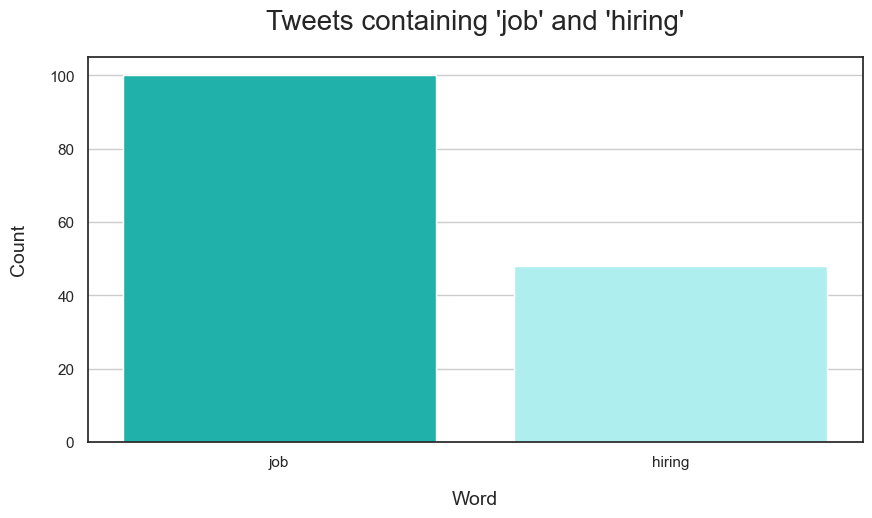

In [112]:
# Set the plot size and style.
plt.figure(figsize=(10,5))
sns.set_style("white")

# Plot the number of tweets containing 'job' and 'hiring'.
plt.bar(x=["job", "hiring"], 
        height=[job_tweets.shape[0], 
                hiring_tweets.shape[0]], 
                color=["lightseagreen", "paleturquoise"])

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Set the title and labels.
plt.title("Tweets containing 'job' and 'hiring'", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Count", fontsize=14, labelpad=15)
plt.xlabel("Word", fontsize=14, labelpad=15)   


**Note**

From the analysis we can see that 'job' and 'hiring' are icluded in the list of trending hashtags on Twitter, and when looking through the related tweets it is evident that Twitter is being used for recruitment purposes. However, it is difficult to derive any further insights regarding the NHS from this data alone. It could be an indication of a general staff shortage in healthcare. 

**2. Explore tweets related to NHS and missed appointments.**

In [113]:
# Search the 'tweet_full_text' column for tweets containing 'NHS'.
nhs_tweets = tweets[tweets["tweet_full_text"].str.contains("NHS", case=False)]

# View the result.
print(nhs_tweets.shape)
nhs_tweets


(3, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
200,1567654557768982529,RT @LaunchpadDevon: @RDCareersNHS Recruitment Event Exeter – Saturday 17 September\n\nThis event is for anyone interested in roles availabl…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'LaunchpadDevon', 'name': 'Skills Launchpad - Devon', 'id': 1382016925421735941, 'id_str': '1382016925421735941', 'indices': [3, 1...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
231,1567652040192532480,RT @SkillsLaunchpad: Recruitment Event Exeter – Saturday 17 September with @RDCareersNHS \n\nFor anyone interested in #administration #heal…,"{'hashtags': [{'text': 'administration', 'indices': [118, 133]}], 'symbols': [], 'user_mentions': [{'screen_name': 'SkillsLaunchpad', 'name': 'Heart of the South West - Skills Launchpad', 'id': 10...",#administration,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
450,1567633960879984640,HLA Scholar Thessa Rebecca Frieble from our Amsterdam cohort tells us what leadership means to her.\n\nhttps://t.co/Wt4ZmQ3H3z\n\n#HLAScholars #Leadership #HLA #Healthcare #NHS #doctor #Medical #S...,"{'hashtags': [{'text': 'HLAScholars', 'indices': [126, 138]}, {'text': 'Leadership', 'indices': [139, 150]}, {'text': 'HLA', 'indices': [151, 155]}, {'text': 'Healthcare', 'indices': [156, 167]}, ...","#HLAScholars, #Leadership, #HLA, #Healthcare, #NHS, #doctor, #Medical, #Student, #Nurse, #globalhealth, #meded","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [114]:
# Search the 'tweet_full_text' column for tweets containing 'appointment'.
appointment_tweets = tweets[tweets["tweet_full_text"].str.contains("appointment", case=False)]

# View the result.
print(appointment_tweets.shape)
appointment_tweets


(8, 10)


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
47,1567580499421569025,RT @_timos_: Purespring Therapeutics strengthens scientific leadership with the appointment of Alice Brown as Chief Scientific Officer - Ya…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': '_timos_', 'name': 'Dr Timos Papagatsias', 'id': 133504478, 'id_str': '133504478', 'indices': [3, 11]}], 'urls': []}",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
59,1567580395142803459,Purespring Therapeutics strengthens scientific leadership with the appointment of Alice Brown as Chief Scientific Officer - Yahoo Finance https://t.co/gyLsztiV0D #strategy #competitiveintelligence...,"{'hashtags': [{'text': 'strategy', 'indices': [162, 171]}, {'text': 'competitiveintelligence', 'indices': [172, 196]}, {'text': 'marketing', 'indices': [197, 207]}, {'text': 'pharma', 'indices': [...","#strategy, #competitiveintelligence, #marketing, #pharma, #healthcare, #biotech, #competitivemarketing, #pharmaceutical","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
339,1567643379894292481,"Hiring Alert: Patient Service Representative (#Canton, Michigan) Dental Care Alliance #job #SchedulingAppointments #TreatmentPlanning #HealthCare https://t.co/obOiJBdaAY https://t.co/DiFIPWCJV5","{'hashtags': [{'text': 'Canton', 'indices': [46, 53]}, {'text': 'job', 'indices': [86, 90]}, {'text': 'SchedulingAppointments', 'indices': [91, 114]}, {'text': 'TreatmentPlanning', 'indices': [115...","#Canton, #job, #SchedulingAppointments, #TreatmentPlanning, #HealthCare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
346,1567642874715455491,"New Opportunity: Patient Service Representative (#Dearborn, Michigan) Dental Care Alliance #job #SchedulingAppointments #TreatmentPlanning #HealthCare https://t.co/qdPG2VEjTu https://t.co/Z7e9JmuTED","{'hashtags': [{'text': 'Dearborn', 'indices': [49, 58]}, {'text': 'job', 'indices': [91, 95]}, {'text': 'SchedulingAppointments', 'indices': [96, 119]}, {'text': 'TreatmentPlanning', 'indices': [1...","#Dearborn, #job, #SchedulingAppointments, #TreatmentPlanning, #HealthCare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
351,1567642370224623616,"New Opportunity: Patient Service Representative (#Warren, Michigan) Dental Care Alliance #job #SchedulingAppointments #TreatmentPlanning #HealthCare https://t.co/3oyKYhtwC8 https://t.co/atY7yvL1yC","{'hashtags': [{'text': 'Warren', 'indices': [49, 56]}, {'text': 'job', 'indices': [89, 93]}, {'text': 'SchedulingAppointments', 'indices': [94, 117]}, {'text': 'TreatmentPlanning', 'indices': [118...","#Warren, #job, #SchedulingAppointments, #TreatmentPlanning, #HealthCare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
360,1567641873879121921,"Hot Job: Patient Service Representative (#EastLansing, Michigan) Dental Care Alliance #job #SchedulingAppointments #TreatmentPlanning #HealthCare https://t.co/f3mllZusfs https://t.co/mSmGOFW5aI","{'hashtags': [{'text': 'EastLansing', 'indices': [41, 53]}, {'text': 'job', 'indices': [86, 90]}, {'text': 'SchedulingAppointments', 'indices': [91, 114]}, {'text': 'TreatmentPlanning', 'indices':...","#EastLansing, #job, #SchedulingAppointments, #TreatmentPlanning, #HealthCare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
701,1567615451731050497,Period dignity officer role scrapped after abuse over man's appointment #health #mentalhealth #healthcare #wellness #healthissues #care #goodhealth https://t.co/HbOc4tIeuM,"{'hashtags': [{'text': 'health', 'indices': [72, 79]}, {'text': 'mentalhealth', 'indices': [80, 93]}, {'text': 'healthcare', 'indices': [94, 105]}, {'text': 'wellness', 'indices': [106, 115]}, {'t...","#health, #mentalhealth, #healthcare, #wellness, #healthissues, #care, #goodhealth","{'iso_lang

**Note**

There are only 3 tweets mentioning the NHS, and none of them are from a patient's perspective. 8 tweets mention appointment, however none of them are in the context of missed NHS appointment. Another point worth taking into consideration is that many of the tweets are in relation to healthcare in other countries, and have no relation to the NHS.  Based on the analysis we cannot determine any correlation between the twitter data and NHS performance. 

# 

## 6) Assignment activity 6


> Investigate the main concerns posed by the NHS. 

In [115]:
# View the ar DataFrame.
ar.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_date
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,2020-01-01
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,2020-01-01
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,2020-01-01
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,2020-01-01
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,2020-01-01


In [116]:
# Determine and print the minimum and maximum dates in the ar DataFrame.
print(f"\nar min appointment month: {ar.appointment_month.min()}")
print(f"ar max appointment month: {ar.appointment_month.max()}")



ar min appointment month: 2020-01
ar max appointment month: 2022-06


In [117]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_updated_timeframe = ar[(ar["appointment_month"] >= "2021-08")]

# Review the updated minimum and maximum dates.
print(f"\nar updated min appointment month: {ar_updated_timeframe.appointment_month.min()}")
print(f"ar updated max appointment month: {ar_updated_timeframe.appointment_month.max()}")



ar updated min appointment month: 2021-08
ar updated max appointment month: 2022-06


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [118]:
# Create an aggregated data set to review the different features.
ar_aggregated = ar_updated_timeframe.groupby(["appointment_month", "appointment_status", "hcp_type", 
                                     "appointment_mode", "time_between_book_and_appointment"]
                                    )["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_aggregated.head()


,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,Attended,GP,Face-to-Face,1 Day,507835
1,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,194726
2,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,959486
3,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,102111
4,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,398772


**Number of Appointments per Month**

In [119]:
# Determine the total number of appointments per month.
ar_total_appt_per_month = ar_aggregated.groupby(["appointment_month"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_total_appt_per_month


,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [120]:
# Convert the appointment_month to string data type for ease of visualisation.
ar_total_appt_per_month["appointment_month"] = ar_total_appt_per_month["appointment_month"].astype("string")

# Check the data types.
ar_total_appt_per_month.dtypes


appointment_month        string[python]
count_of_appointments             int64
dtype: object

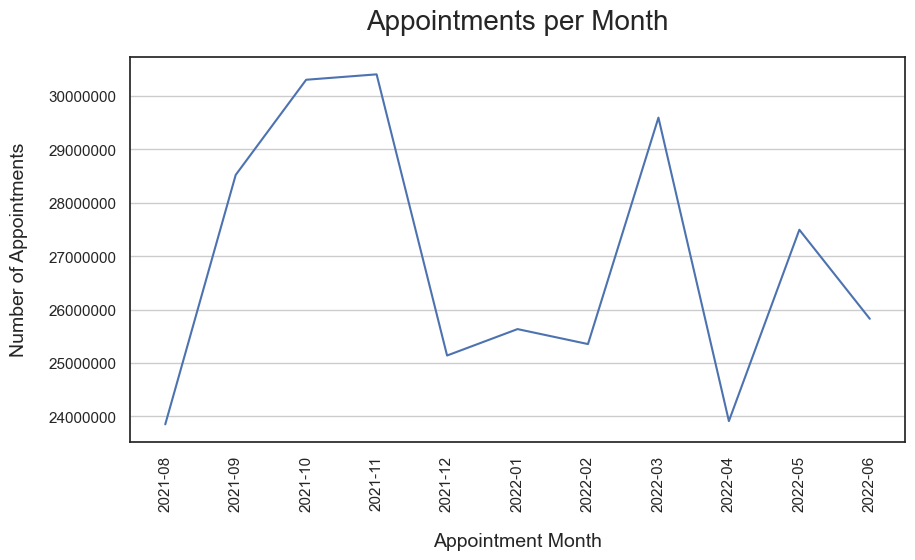

In [121]:
# Create a lineplot and plot the number of monthly visits.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_total_appt_per_month,
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Monthly Capacity Utilisation**

In [122]:
# Create a new DataFrame for capacity.
capacity = pd.DataFrame({"date": pd.date_range(start="2021-08-01", end="2022-06-30")})

# Add a new column "capacity" as maximum daily capacity == 1,200,000.
capacity["capacity"] = 1_200_000

# View the DataFrame.
capacity.head()


,date,capacity
0,2021-08-01,1200000
1,2021-08-02,1200000
2,2021-08-03,1200000
3,2021-08-04,1200000
4,2021-08-05,1200000


In [123]:
# Resample the daily data to monthly to get monthly capacity. 
monthly_capacity = capacity.resample(rule="M", on="date")["capacity"].sum().reset_index()

# Format the date column.
monthly_capacity["date"] = monthly_capacity["date"].dt.strftime("%Y-%m")

# View the DataFrame.
monthly_capacity.head()


,date,capacity
0,2021-08,37200000
1,2021-09,36000000
2,2021-10,37200000
3,2021-11,36000000
4,2021-12,37200000


In [124]:
# Merge the DataFrames.
utilisation_capacity = pd.merge(ar_total_appt_per_month, monthly_capacity, 
                                left_on="appointment_month", right_on="date")

# Drop the "date" column.
utilisation_capacity.drop(columns=["date"], inplace=True)

# View the DataFrame.
utilisation_capacity.head()


,appointment_month,count_of_appointments,capacity
0,2021-08,23852171,37200000
1,2021-09,28522501,36000000
2,2021-10,30303834,37200000
3,2021-11,30405070,36000000
4,2021-12,25140776,37200000


In [125]:
# Create a new column "utilisation" to indicate utilisation of services.
utilisation_capacity["utilisation"] = utilisation_capacity["count_of_appointments"] / utilisation_capacity[
    "capacity"] * 100

# Round the "utilisation" column.
utilisation_capacity["utilisation"] = utilisation_capacity["utilisation"].round(1)

# View the DataFrame.
utilisation_capacity.head()


,appointment_month,count_of_appointments,capacity,utilisation
0,2021-08,23852171,37200000,64.1
1,2021-09,28522501,36000000,79.2
2,2021-10,30303834,37200000,81.5
3,2021-11,30405070,36000000,84.5
4,2021-12,25140776,37200000,67.6


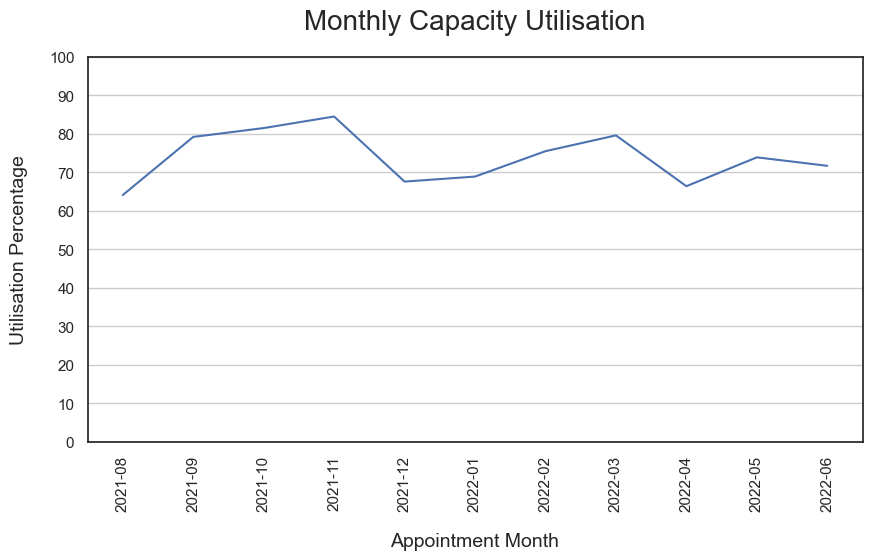

In [126]:
# Plot monthly capacity utilisation.
monthly_capacity_utilisation = sns.lineplot(x="appointment_month", 
                                            y="utilisation", 
                                            data=utilisation_capacity, 
                                            errorbar=None, 
                                            palette="colorblind")

# Set the title and labels.
plt.title("Monthly Capacity Utilisation", fontsize=20, y=1.05)
plt.ylabel("Utilisation Percentage", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Add ticks to y-axis.
monthly_capacity_utilisation.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Set gridlines for y-axis.
plt.grid(axis = "y")


In [127]:
# Determine the month that has the highest number of appointments.
print(utilisation_capacity.count_of_appointments.max())

# View the row. 
utilisation_capacity[utilisation_capacity["count_of_appointments"] == 30405070]


30405070


,appointment_month,count_of_appointments,capacity,utilisation
3,2021-11,30405070,36000000,84.5


**Note** 

As the NHS has provided a figure of an average of 1,200,000 appointments per day as a guideline for maximum capacity being used for planning purpose, we can see from the analysis that none of the months in the time frame has reached or exceeded the daily average. The highest monthly utilisation of NHS services is in November 2021 with 84.5%. 

**Question 2:** How do the healthcare professional types differ over time?

In [128]:
# Create a new DataFrame to determine the number of appointments per hpc type per month.
ar_updated_timeframe_hcp_type = ar_updated_timeframe.groupby(["appointment_month", 
                               "hcp_type"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_updated_timeframe_hcp_type.head()


,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,12299022
1,2021-08,Other Practice staff,10797821
2,2021-08,Unknown,755328
3,2021-09,GP,14487785
4,2021-09,Other Practice staff,13126731


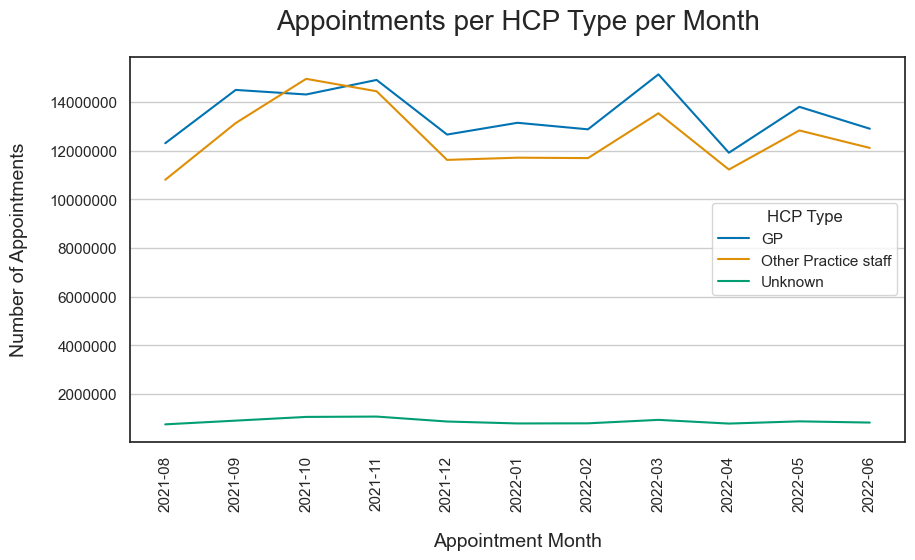

In [129]:
# Create a lineplot and plot the appointments per hcp type per month.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             hue="hcp_type",
             data=ar_updated_timeframe_hcp_type,
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per HCP Type per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="HCP Type")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

The majority of appointments are with GPs.

**Question 3:** Are there significant changes in whether or not visits are attended?

In [130]:
# Create a new DataFrame to determine the number of appointments per appointment status per month.
ar_updated_timeframe_appt_status = ar_updated_timeframe.groupby(["appointment_month", 
                               "appointment_status"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_updated_timeframe_appt_status.head()


,appointment_month,appointment_status,count_of_appointments
0,2021-08,Attended,22081765
1,2021-08,DNA,949137
2,2021-08,Unknown,821269
3,2021-09,Attended,25757066
4,2021-09,DNA,1321348


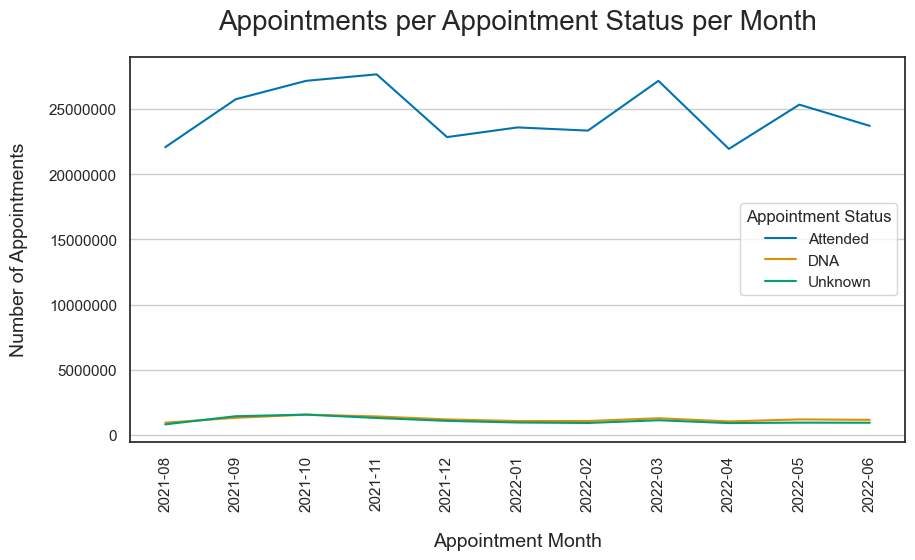

In [131]:
# Create a lineplot and plot the number of appointments per appointment status per month.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_updated_timeframe_appt_status,
             hue="appointment_status",
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Appointment Status per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Appointment Status")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note** 

Based on this lineplot we can see some fluctuations in the number of attended appointments, there is a spike around Novemeber, and then the number of attended appointments drop over the Christmas period, and increase again early spring. It is difficult to see any major changes in unattended appointments based on this plot, so I will create a second plot excluding appointment status "Attended".

In [132]:
# Create a new DataFrame to closer examine unattended appointments.
ar_updated_timeframe_not_attended = ar_updated_timeframe.groupby(["appointment_month", 
                               "appointment_status"])["count_of_appointments"].sum().reset_index()

# Filter to exclude General Practice.
ar_updated_timeframe_not_attended = ar_updated_timeframe_not_attended[
    ar_updated_timeframe_not_attended["appointment_status"] != "Attended"]

# View the output.
ar_updated_timeframe_not_attended.head()


,appointment_month,appointment_status,count_of_appointments
1,2021-08,DNA,949137
2,2021-08,Unknown,821269
4,2021-09,DNA,1321348
5,2021-09,Unknown,1444087
7,2021-10,DNA,1565624


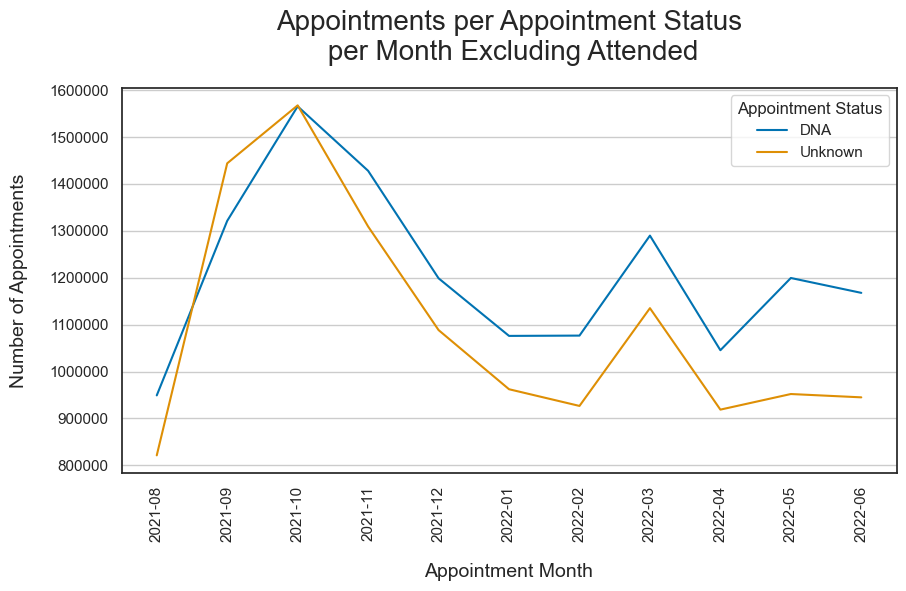

In [133]:
# Create a lineplot and plot the number of appointments per appointment status per month excluding "Attended".
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_updated_timeframe_not_attended,
             hue="appointment_status",
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Appointment Status\n per Month Excluding Attended", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Appointment Status")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note**

There is a significant spike in unattended and unknown status appointments leading up to October 2021 where the number of unattended as well as unknown status appointments almost doubled. 

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [134]:
# Create a new DataFrame to determine the number of appointments per appointment status per month.
ar_updated_timeframe_appt_mode = ar_updated_timeframe.groupby(["appointment_month", 
                               "appointment_mode"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_updated_timeframe_appt_mode.head()


,appointment_month,appointment_mode,count_of_appointments
0,2021-08,Face-to-Face,13717325
1,2021-08,Home Visit,151619
2,2021-08,Telephone,9149072
3,2021-08,Unknown,724126
4,2021-08,Video/Online,110029


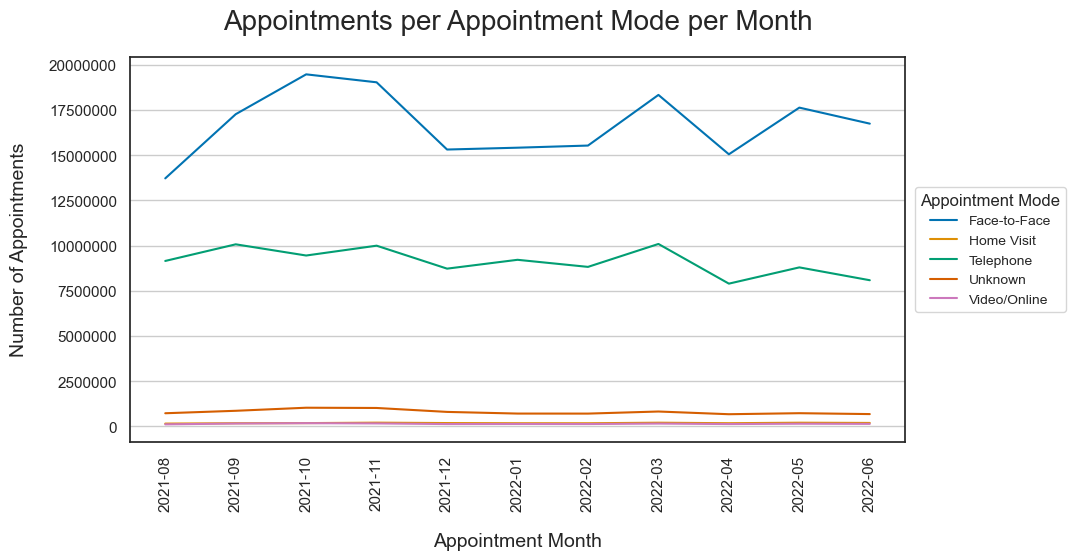

In [135]:
# Create a lineplot and plot the number of appointments per appointment mode per month.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_updated_timeframe_appt_mode,
             hue="appointment_mode",
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Appointment Mode per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Appointment Mode", 
           bbox_to_anchor =(1.11, 0.5), 
           loc="center", 
           fontsize=10)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Question 5:** Are there any trends in time between booking an appointment?

In [136]:
# Create a new DataFrame to determine the wait time for appointments per month.
ar_updated_timeframe_wait_time = ar_updated_timeframe.groupby(["appointment_month", 
                               "time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_updated_timeframe_wait_time.head()


,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2021-08,1 Day,2018319
1,2021-08,15 to 21 Days,1453209
2,2021-08,2 to 7 Days,4924960
3,2021-08,22 to 28 Days,828866
4,2021-08,8 to 14 Days,2889150


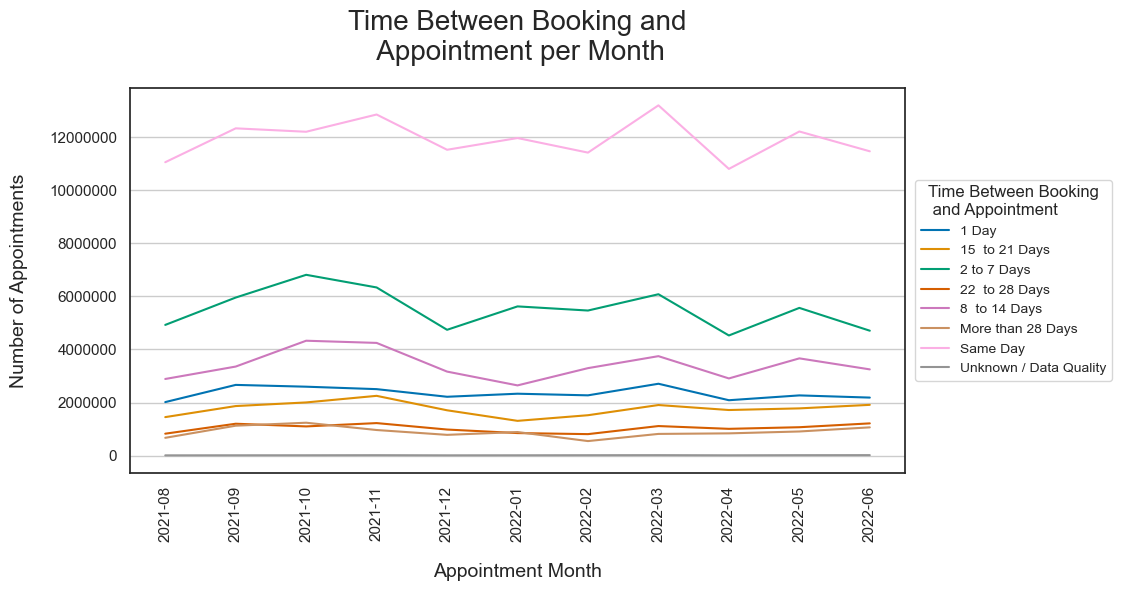

In [137]:
# Create a lineplot and plot the time in between booking and appointment per month.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_updated_timeframe_wait_time,
             hue="time_between_book_and_appointment",
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Time Between Booking and\n Appointment per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Time Between Booking\n and Appointment", 
           bbox_to_anchor =(1.14, 0.5), 
           loc="center", 
           fontsize=10)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Note** 

I will also create a barchart to show the wait time distribution.

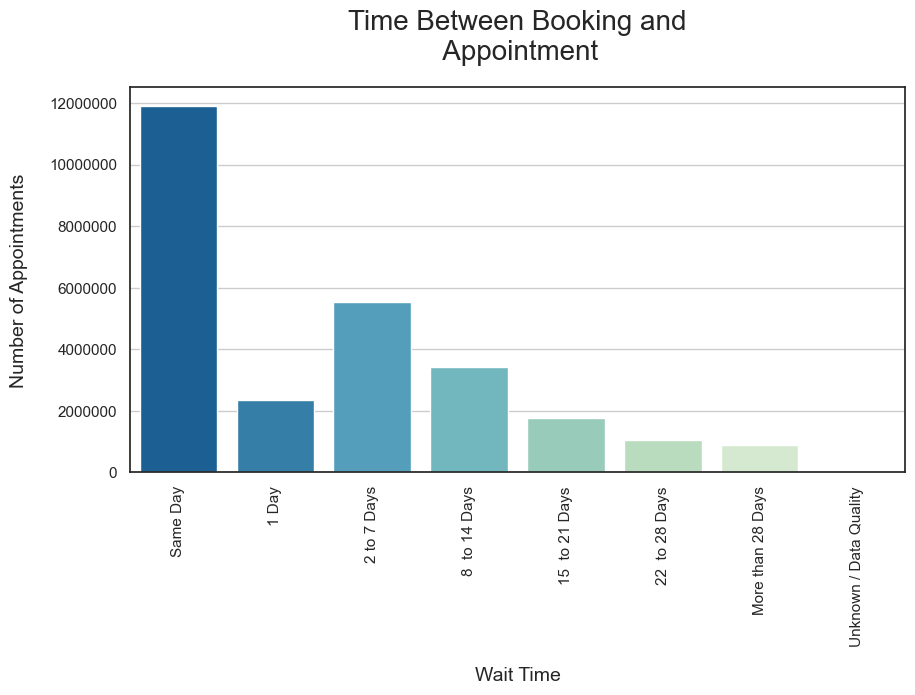

In [139]:
# Determine how long patients have to wait for an appointment for the given time frame.
ar_updated_timeframe_wait_time_index = ar_updated_timeframe.groupby(["appointment_month", 
                               "time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()

# Set indexes based on time between booking and appointment.
ar_updated_timeframe_wait_time_index.index = ar_updated_timeframe_wait_time_index[
    "time_between_book_and_appointment"].map({"Same Day": 0, 
                                              "1 Day": 1, 
                                              "2 to 7 Days": 2, 
                                              "8  to 14 Days": 3, 
                                              "15  to 21 Days": 4, 
                                              "22  to 28 Days": 5, 
                                              "More than 28 Days": 6, 
                                              "Unknown / Data Quality": 7})

# Sort values.
ar_updated_timeframe_wait_time_index_sorted = ar_updated_timeframe_wait_time_index.sort_index()

# Plot the wait time.
sns.barplot(x="time_between_book_and_appointment", 
            y="count_of_appointments",
            data=ar_updated_timeframe_wait_time_index_sorted,
            errorbar=None,
            palette="GnBu_r")

# Set the title and labels.
plt.title("Time Between Booking and\n Appointment", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Wait Time", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**Question 6:** How does the spread of service settings compare?

In [140]:
# View the national category DataFrame created in an earlier assignment activity.
nc.head()


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [141]:
# Create a new DataFrame consisting of the month of appointment, service setting and the number of appointments.
nc_appt_per_month_per_ss = nc.groupby(["appointment_month", 
                                       "service_setting"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
nc_appt_per_month_per_ss.head()


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


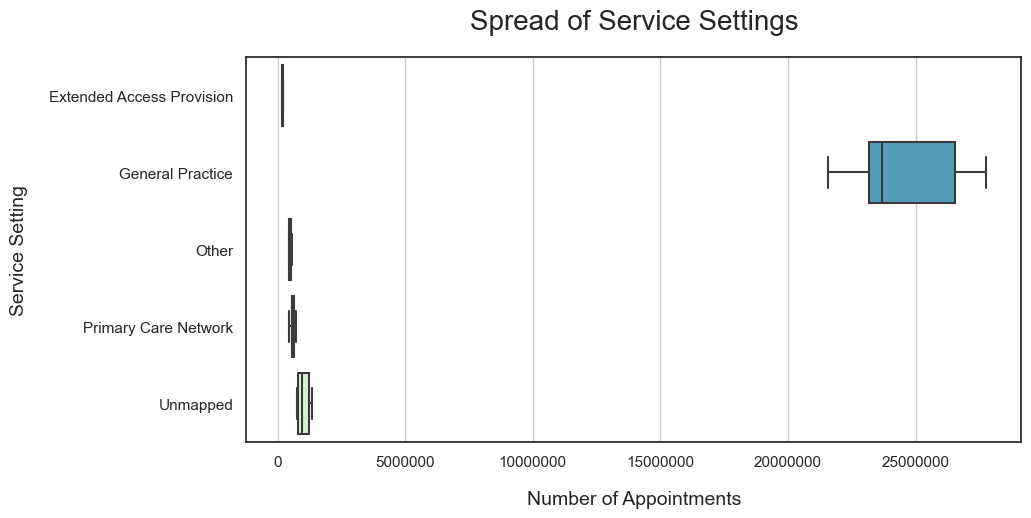

In [143]:
# Plot the spread of service settings excluding "General Practice".
sns.boxplot(x="count_of_appointments", 
            y="service_setting",
            data=nc_appt_per_month_per_ss,
            palette="GnBu_r")

# Set the title and labels.
plt.title("Spread of Service Settings", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Service Setting", fontsize=14, labelpad=15)
plt.xlabel("Number of Appointments", fontsize=14, labelpad=15)

# Set gridlines for x-axis.
plt.grid(axis = "x")

# Remove scientific notation.
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)


In [144]:
# Filter the DataFrame to exclude "service_setting" == General Practice.
nc_appt_per_month_per_ss_no_gp = nc_appt_per_month_per_ss[
    nc_appt_per_month_per_ss["service_setting"] != "General Practice"]

# View the DataFrame.
nc_appt_per_month_per_ss_no_gp.head()


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906


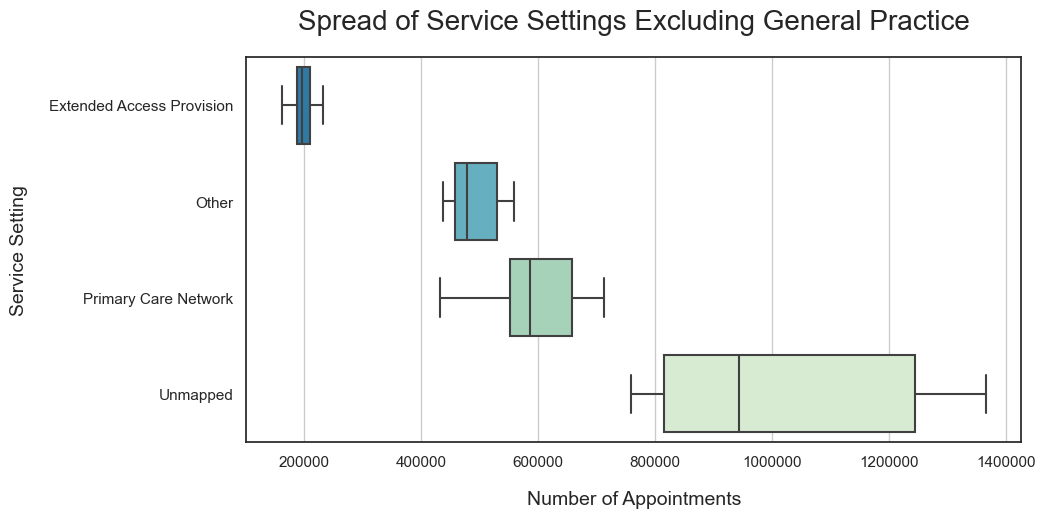

In [146]:
# Plot the spread of service settings excluding "General Practice".
sns.boxplot(x="count_of_appointments", 
            y="service_setting",
            data=nc_appt_per_month_per_ss_no_gp,
            palette="GnBu_r")

# Set the title and labels.
plt.title("Spread of Service Settings Excluding General Practice", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Service Setting", fontsize=14, labelpad=15)
plt.xlabel("Number of Appointments", fontsize=14, labelpad=15)

# Set gridlines for x-axis.
plt.grid(axis = "x")

# Remove scientific notation.
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)


### Additional questions

**1. Explore the monthly capacity utilisation for the whole ar DataFrame date range.**

In [147]:
# Create a new DataFrame for capacity for the whole ar DataFrame time range.
ar_full_capacity = pd.DataFrame({"date": pd.date_range(start="2020-01-01", end="2022-06-30")})

# Add a new column "capacity" as maximum daily capacity == 1,200,000.
ar_full_capacity["capacity"] = 1_200_000

# View the DataFrame.
ar_full_capacity.head()


,date,capacity
0,2020-01-01,1200000
1,2020-01-02,1200000
2,2020-01-03,1200000
3,2020-01-04,1200000
4,2020-01-05,1200000


In [148]:
# Resample the daily data to monthly to get monthly capacity. 
ar_monthly_capacity = ar_full_capacity.resample(rule="M", on="date")["capacity"].sum().reset_index()

# Format the date column.
ar_monthly_capacity["date"] = ar_monthly_capacity["date"].dt.strftime("%Y-%m")

# View the DataFrame.
ar_monthly_capacity.head()


,date,capacity
0,2020-01,37200000
1,2020-02,34800000
2,2020-03,37200000
3,2020-04,36000000
4,2020-05,37200000


In [149]:
# Merge the DataFrames.
ar_utilisation_capacity = pd.merge(ar_appointments_per_month, ar_monthly_capacity, 
                                left_on="appointment_month", right_on="date")

# Drop the "date" column.
ar_utilisation_capacity.drop(columns=["date"], inplace=True)

# View the DataFrame.
ar_utilisation_capacity.head()


,appointment_month,count_of_appointments,capacity
0,2020-01,27199296,37200000
1,2020-02,24104621,34800000
2,2020-03,24053468,37200000
3,2020-04,16007881,36000000
4,2020-05,16417212,37200000


In [150]:
# Create a new column "utilisation" to indicate utilisation of services.
ar_utilisation_capacity["utilisation"] = ar_utilisation_capacity[
    "count_of_appointments"] / ar_utilisation_capacity["capacity"] * 100

# Round the "utilisation" column.
ar_utilisation_capacity["utilisation"] = ar_utilisation_capacity["utilisation"].round(1)

# View the DataFrame.
ar_utilisation_capacity.head()


,appointment_month,count_of_appointments,capacity,utilisation
0,2020-01,27199296,37200000,73.1
1,2020-02,24104621,34800000,69.3
2,2020-03,24053468,37200000,64.7
3,2020-04,16007881,36000000,44.5
4,2020-05,16417212,37200000,44.1


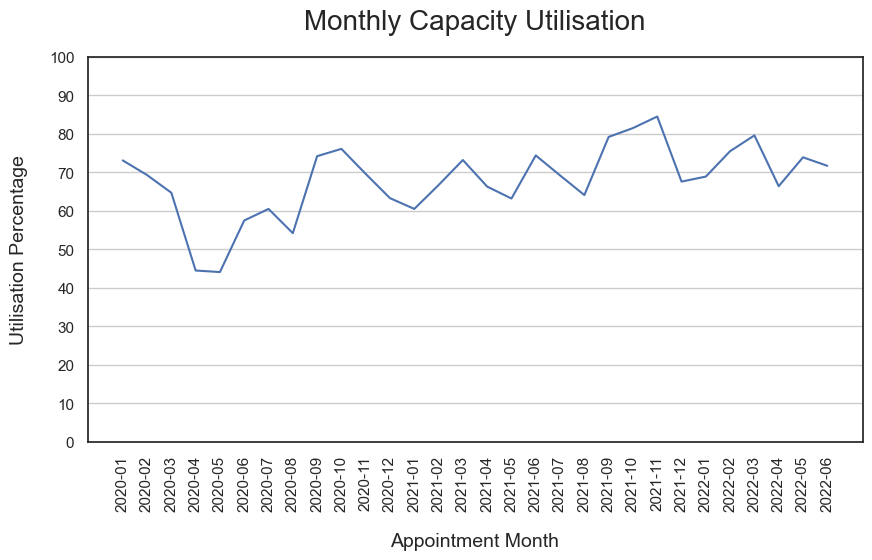

In [151]:
# Plot monthly capacity utilisation.
ar_monthly_capacity_utilisation = sns.lineplot(x="appointment_month", 
                                            y="utilisation", 
                                            data=ar_utilisation_capacity, 
                                            errorbar=None, 
                                            palette="colorblind")

# Set the title and labels.
plt.title("Monthly Capacity Utilisation", fontsize=20, y=1.05)
plt.ylabel("Utilisation Percentage", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Add ticks to y-axis.
ar_monthly_capacity_utilisation.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Set gridlines for y-axis.
plt.grid(axis = "y")


**Note**

Looking at the monthly capacity utilisation for the whole ar DataFrame date range it is evident that the maximum capacity of 1,200,000 appointments per day has not been exceeded during this period. However, there is an upward trend in utilisation and this should be monitored especially in networks with high utilisation to ensure the maximum capacity is not exceeded.

**2. Explore monthly ICB capacity utilisation.**

**Note**

As the only figure I have access to is the average of 1,200,000 appointments per day as a guideline for maximum capacity I will work with the assumption that the number of appointments is evenly distributed between the ICBs and look at average utilisation. I suggest further information about resource distribution and specific ICB capacity is required to produce a more detailed representation of utilisation.

In [152]:
# Determine the total number of appointments per icb per month.
ar_total_appt_per_icb_per_month = ar.groupby(["appointment_month", 
                                              "icb_ons_code"])["count_of_appointments"].sum().reset_index()

# View the DataFrame.
ar_total_appt_per_icb_per_month.head()


,appointment_month,icb_ons_code,count_of_appointments
0,2020-01,E54000008,1193082
1,2020-01,E54000010,475292
2,2020-01,E54000011,244279
3,2020-01,E54000013,396119
4,2020-01,E54000015,566021


In [153]:
# Create a new DataFrame for capacity fror the whole date range of the ar DataFrame.
capacity_icb = pd.DataFrame({"date": pd.date_range(start="2020-01-01", end="2022-06-30")})

# Add a new column "capacity" as maximum daily capacity == 1,200,000.
capacity_icb["capacity"] = 1_200_000

# View the DataFrame.
capacity_icb.head()


,date,capacity
0,2020-01-01,1200000
1,2020-01-02,1200000
2,2020-01-03,1200000
3,2020-01-04,1200000
4,2020-01-05,1200000


In [154]:
# Resample the daily data to monthly to get monthly capacity. 
capacity_icb_monthly = capacity_icb.resample(rule="M", on="date")["capacity"].sum().reset_index()

# Format the date column.
capacity_icb_monthly["date"] = capacity_icb_monthly["date"].dt.strftime("%Y-%m")

# View the DataFrame.
capacity_icb_monthly.head()


,date,capacity
0,2020-01,37200000
1,2020-02,34800000
2,2020-03,37200000
3,2020-04,36000000
4,2020-05,37200000


In [155]:
# Calculate the monthly capacity per ICB assuming equal distribution.
capacity_icb_monthly["icb_capacity"] = capacity_icb_monthly["capacity"] / 42

# Round the "icb_capacity".
capacity_icb_monthly["icb_capacity"] = (capacity_icb_monthly["icb_capacity"].round(0)).astype("int")

# View the DataFrame.
capacity_icb_monthly.head()


,date,capacity,icb_capacity
0,2020-01,37200000,885714
1,2020-02,34800000,828571
2,2020-03,37200000,885714
3,2020-04,36000000,857143
4,2020-05,37200000,885714


In [156]:
# Merge the DataFrames.
icb_utilisation_capacity = pd.merge(ar_total_appt_per_icb_per_month, capacity_icb_monthly, 
                                left_on="appointment_month", right_on="date")

# Drop the "date" column.
icb_utilisation_capacity.drop(columns=["date"], inplace=True)

# View the DataFrame.
icb_utilisation_capacity.head()


,appointment_month,icb_ons_code,count_of_appointments,capacity,icb_capacity
0,2020-01,E54000008,1193082,37200000,885714
1,2020-01,E54000010,475292,37200000,885714
2,2020-01,E54000011,244279,37200000,885714
3,2020-01,E54000013,396119,37200000,885714
4,2020-01,E54000015,566021,37200000,885714


In [157]:
# Create a new column "utilisation" to indicate utilisation of services.
icb_utilisation_capacity["icb_utilisation"] = icb_utilisation_capacity[
    "count_of_appointments"] / icb_utilisation_capacity["icb_capacity"] * 100

# Round the "utilisation" column.
icb_utilisation_capacity["icb_utilisation"] = icb_utilisation_capacity["icb_utilisation"].round(1)

# View the DataFrame.
icb_utilisation_capacity.head()


,appointment_month,icb_ons_code,count_of_appointments,capacity,icb_capacity,icb_utilisation
0,2020-01,E54000008,1193082,37200000,885714,134.7
1,2020-01,E54000010,475292,37200000,885714,53.7
2,2020-01,E54000011,244279,37200000,885714,27.6
3,2020-01,E54000013,396119,37200000,885714,44.7
4,2020-01,E54000015,566021,37200000,885714,63.9


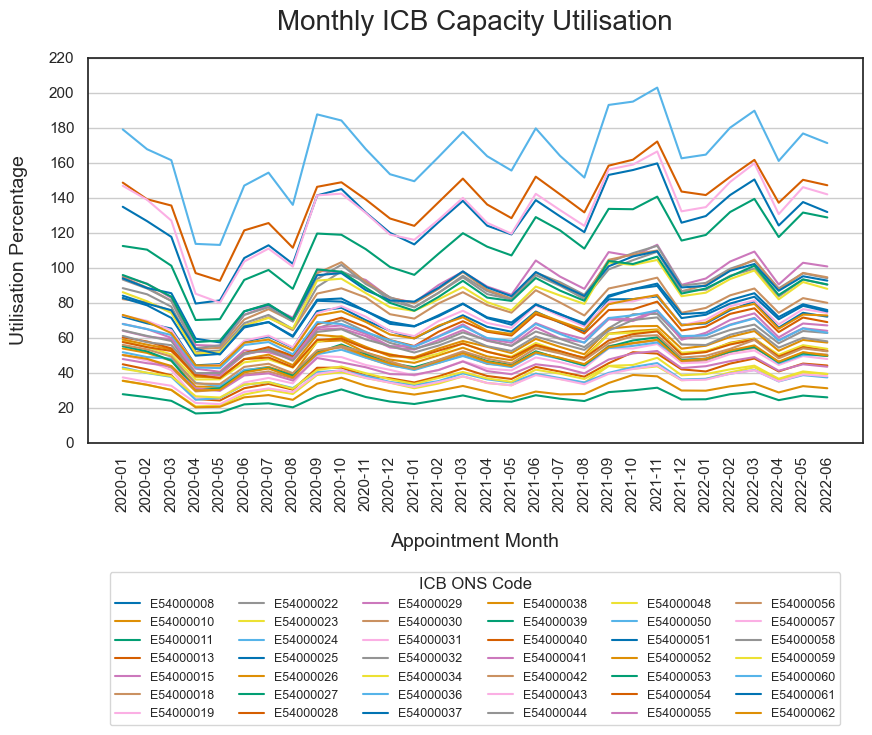

In [158]:
# Plot monthly ICB capacity utilisation.
icb_monthly_capacity_utilisation = sns.lineplot(x="appointment_month", 
                                            y="icb_utilisation", 
                                            data=icb_utilisation_capacity, 
                                            hue="icb_ons_code",
                                            errorbar=None, 
                                            palette="colorblind")

# Set the title and labels.
plt.title("Monthly ICB Capacity Utilisation", fontsize=20, y=1.05)
plt.ylabel("Utilisation Percentage", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(bbox_to_anchor =(0.5, -0.75), 
           fontsize=9,
           loc="lower center",
           ncols=6,
           title="ICB ONS Code")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Add ticks to y-axis.
icb_monthly_capacity_utilisation.set_yticks([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])

# Set gridlines for y-axis.
plt.grid(axis = "y")


**Note**

From this analysis it is clear that there are ICBs that are considerably below, and above, average in terms of capacity utilisation. Further research into ICB resource allocation would benefit future distribution of resources to ensure all ICBs are able to keep up with the increasing demand of GP services. 

**3. Explore the monthly unattended appointments for the whole ar DataFrame date range.**

In [159]:
# Create a new DataFrame to explore unattended appointments.
ar_not_attended = ar[(ar["appointment_status"] == "DNA")].groupby(
    "appointment_month")["count_of_appointments"].sum().reset_index()

# View the output.
ar_not_attended.head()


,appointment_month,count_of_appointments
0,2020-01,1298269
1,2020-02,1215154
2,2020-03,1166314
3,2020-04,478766
4,2020-05,449057


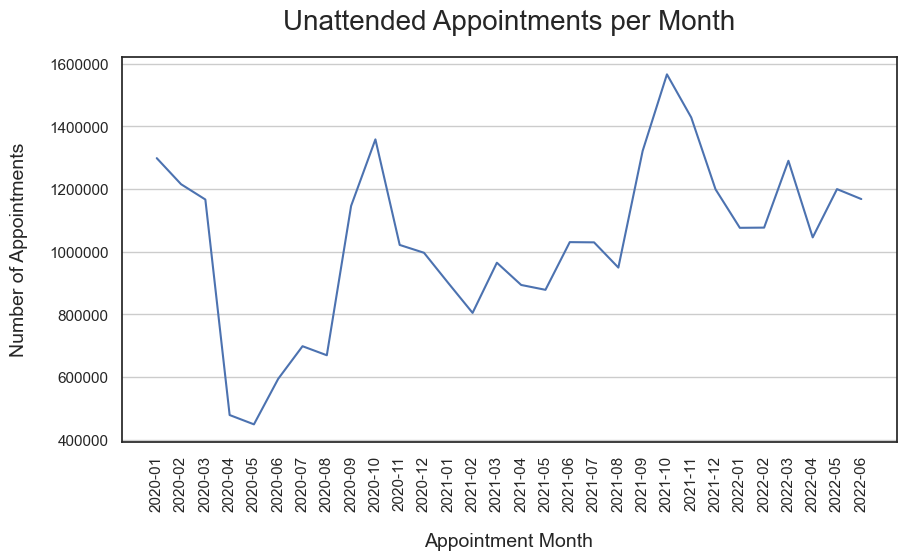

In [160]:
# Create a lineplot and plot the number of appointments per appointment status per month excluding "Attended".
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_not_attended,
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Unattended Appointments per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**4. Explore appointment modes for the whole ar DataFrame date range.**

In [161]:
# Create a new DataFrame to explore appointment modes.
ar_appt_modes = ar.groupby(["appointment_month", "appointment_mode"])["count_of_appointments"].sum().reset_index()

# View the output.
ar_appt_modes.head()


,appointment_month,appointment_mode,count_of_appointments
0,2020-01,Face-to-Face,21733394
1,2020-01,Home Visit,266942
2,2020-01,Telephone,3701775
3,2020-01,Unknown,1302979
4,2020-01,Video/Online,194206


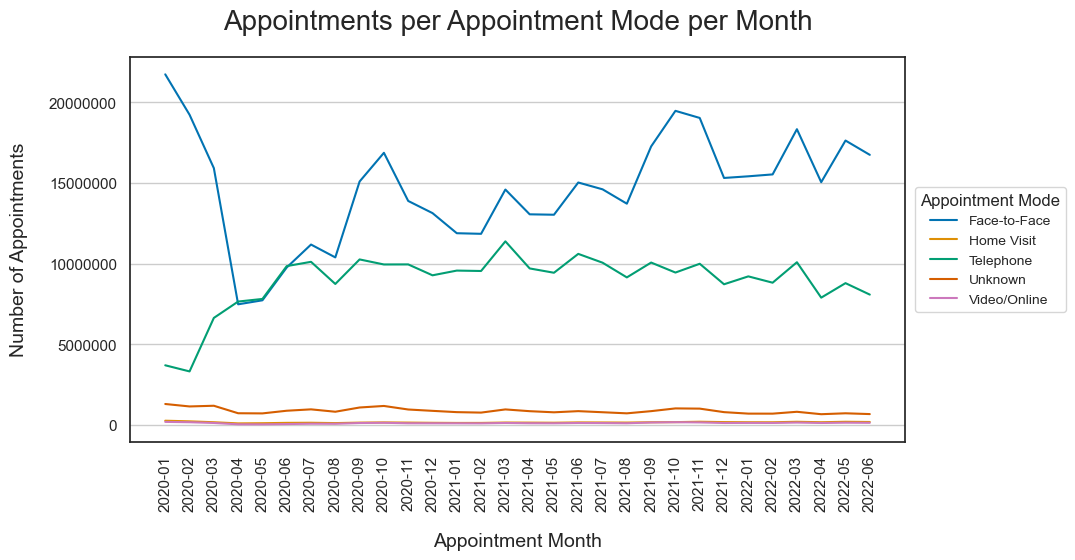

In [162]:
# Create a lineplot and plot the number of appointments per appointment mode per month.
sns.lineplot(x="appointment_month",
             y="count_of_appointments",
             data=ar_appt_modes,
             hue="appointment_mode",
             errorbar=None, 
             palette="colorblind")

# Set the title and labels.
plt.title("Appointments per Appointment Mode per Month", fontsize=20, y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Month", fontsize=14, labelpad=15)

# Modify legend.
plt.legend(title="Appointment Mode", 
           bbox_to_anchor =(1.11, 0.5), 
           loc="center", 
           fontsize=10)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


**5. Visualise the number of appointments per appointment mode and the number of unattended appointments per appointment mode.**

In [163]:
# Group by appointment mode.
ar_appointment_modes = ar.groupby("appointment_mode")["count_of_appointments"].sum() \
.sort_values(ascending=False).reset_index()

# View the DataFrame.
ar_appointment_modes.head()


,appointment_mode,count_of_appointments
0,Face-to-Face,439981729
1,Telephone,267862657
2,Unknown,26451305
3,Home Visit,4887876
4,Video/Online,3620958


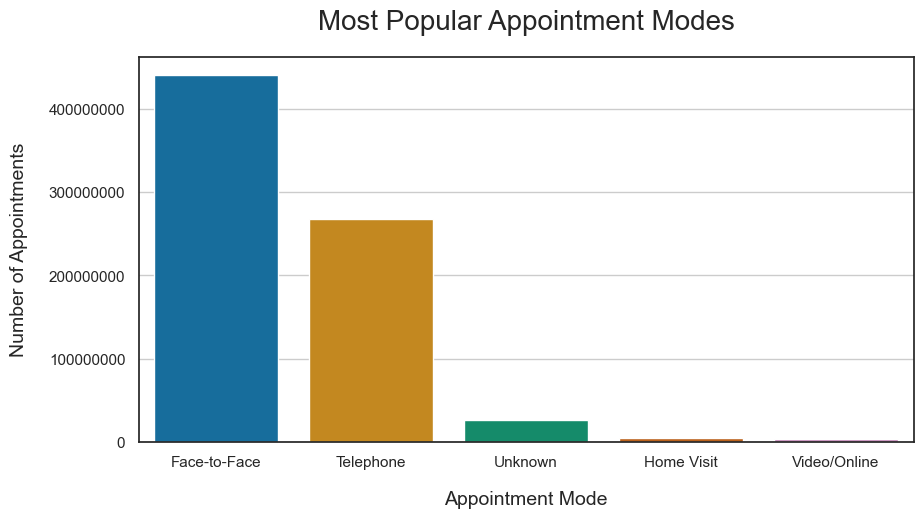

In [164]:
# Plot the number of appointments per appointment mode.
sns.barplot(x="appointment_mode", 
            y="count_of_appointments",
            data=ar_appointment_modes,
            palette="colorblind")

# Set the title and labels.
plt.title("Most Popular Appointment Modes", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Mode", fontsize=14, labelpad=15)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


In [165]:
# Group by appointment mode, set "appointment_status" == "DNA".
ar_missed_appointments = ar[ar["appointment_status"] == "DNA"].groupby("appointment_mode")[
    "count_of_appointments"].sum().sort_values(ascending=False).reset_index()

# View the DataFrame.
ar_missed_appointments.head()


,appointment_mode,count_of_appointments
0,Face-to-Face,24253038
1,Telephone,5262251
2,Unknown,1049427
3,Home Visit,187571
4,Video/Online,158946


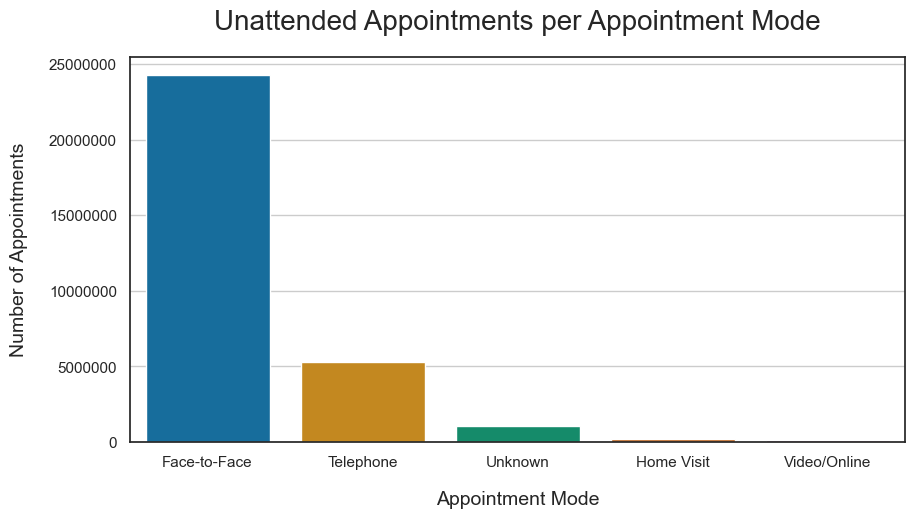

In [166]:
# Plot the unattended number of appointments per appointment mode.
sns.barplot(x="appointment_mode", 
            y="count_of_appointments",
            data=ar_missed_appointments,
            palette="colorblind")

# Set the title and labels.
plt.title("Unattended Appointments per Appointment Mode", 
          fontsize=20, 
          y=1.05)
plt.ylabel("Number of Appointments", fontsize=14, labelpad=15)
plt.xlabel("Appointment Mode", fontsize=14, labelpad=15)

# Set gridlines for y-axis.
plt.grid(axis = "y")

# Remove scientific notation.
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


### Summary of findings and recommendations based on the analysis.

**Trends and patterns**

The most noticeable pattern in the number of appointments is yearly spikes in autumn around October/November time, as well as in spring around March/April time. There is an annual dip in the number of appointments during Christmas time. Most appointments take place early in the week.

Face-to-Face and telephone are the most frequent appointment modes, with Face-to-Face being the top appointment mode. The only exception is in spring 2020 when the first covid-19 national lockdown was put in place and Face-to-Face appointments decreased drastically. To curb the rising trend of missed Face-To-Face and telephone appointments the NHS should investigate the potential of using other appointment modes such as video/online.

Looking at the monthly capacity utilisation it is evident that the maximum capacity of 1,200,000 appointments per day has not been exceeded during this period. However, even if the data suggests that there has been adequate staff and capacity in the networks, there is an upward trend in the number of appointments during the time the data has been collected. This could indicate that even if the level of staff and capacity in the networks would be considered adequate at this time, utilisation should be closely monitored going forward to ensure that the NHS can stay on top of the increasing demand for GP appointments.

Missed appointments pose serious financial implications for the NHS, and have significant impact on utilisation of resources. There are yearly spikes in the number of missed appointments in autumn around October time, and while the rest of the year the number of missed appointments are considerably lower, there is a noticeable increase from 2020 to 2022.

**Recommendations for further analysis**

As a majority of the data has been collected during the covid-19 pandemic, which can be considered a unique circumstance, further analysis of data outside the covid-19 pandemic would contribute to stronger understanding of resource utilisation during regular circumstances.

As there is no data providing information about staff levels in the different networks limited conclusions can be drawn regarding adequate staffing levels, and it would benefit the NHS to further investigate which networks might be understaffed/overstaffed to allocate resources accordingly. 

To fully understand the level of resource utilisation analysis should be done to determine if there are networks that exceed the maximum capacity of 1,200,000 appointments per day, to support adequate resource allocation.

Further information regarding individual ICB capacity as well as sub location capacity would add additional granularity to the analysis and give a more comprehensive understanding of availability, demand, and utilisation of resources.

This analysis has not included any data from the patient’s point of view, patient survey data or similar would add additional valuable insight into performance in the networks.